In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
import scipy as stats 
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))
matplotlib.style.use('ggplot')

In [2]:
circum = pd.read_csv('state_circum.csv', index_col = None ,
                                 encoding = 'ISO-8859-1' )
shooting = pd.read_csv('correction.csv', index_col = None ,
                                 encoding = 'ISO-8859-1')

In [7]:
#shooting.age = shooting.age.astype(int)
#shooting.reset_index()
#shooting.head()
#del shooting['Unnamed: 0']
#del shooting['Armed1']
#shooting.info()
shooting['date'] = pd.to_datetime(shooting['date'])

In [189]:
shooting['age'] = pd.to_numeric(shooting['age'] , errors= 'coerce')

In [ ]:

shooting.loc[shooting.age == 'Unknown' , 'age'] = np.nan
age_map = shooting[['age' , 'race']].groupby('race').mean()
age_dict = age_map.to_dict()['age']
shooting['age'] = shooting['age'].fillna(shooting['race'].map(age_dict))


In [403]:
age_map = shooting[['age' , 'race']].groupby('race').mean().reset_index()

In [404]:
age_map[age_map.race == 'B']['age'].values[0]

32.65665236051502

In [405]:
age_map

,race,age
0,A,34.000000
1,B,32.656652
2,H,33.137001
3,N,30.746269
4,O,32.000000
5,P,33.066667
6,W,40.153157


In [ ]:
shooting[shooting['age'].isnull()]

In [392]:
def age_range(age):
    if (age < 13):
        return 'Under 12'
    elif (age> 12) & (age < 20):
        return '13 - 19'
    elif (age > 19) & (age < 36):
        return'20 - 35'
    elif (age > 35) & (age < 50):
        return '36 - 49'
    elif (age > 49) & (age < 65):
        return '50 - 64'
    elif (age> 64):
        return 'Over 65'

In [768]:
shooting['date'] = pd.to_datetime(shooting['date'])
shooting['Age_range'] = shooting['age'].apply(lambda row : age_range(row) )
shooting = shooting[~(shooting.name == 'TK TK')]
shooting['daysofweek'] = shooting.date.dt.day_name()
shooting['year'] =shooting.date.dt.year

In [472]:
shooting.to_csv('final.csv', index= False)

In [9]:
shooting.race.value_counts(dropna=False)

W    2947
B    1555
H    1035
A     106
N      73
P      24
Name: race, dtype: int64

In [10]:
shooting.flee.value_counts()

not_fleeing    4532
flee           1208
Name: flee, dtype: int64

In [11]:
shooting.Age_range.value_counts(dropna=False)

20 - 35     2808
36 - 49     1606
50 - 64      820
13 - 19      312
Over 65      185
Under 12       9
Name: Age_range, dtype: int64

In [12]:
#shooting['daysofweek'] = shooting.date.dt.day_name()
shooting.daysofweek.value_counts()


Tuesday      879
Friday       851
Wednesday    841
Sunday       817
Thursday     814
Saturday     779
Monday       759
Name: daysofweek, dtype: int64

In [16]:
shooting.head()

,date,age,city,state,threat_level,flee,body_camera,gender,race,armed,...,year,Median Income,share_white,share_black,share_native_american,share_asian,share_hispanic,percent_completed_hs,poverty_rate,month
0,2014-06-07,31,east knoxville,TN,threat,not_fleeing,False,Male,B,unarmed,...,2014,34226.00,0.76,0.17,0.00,0.02,0.05,87.8,25.7,June
1,2018-11-26,23,south knoxville,TN,threat,not_fleeing,False,Female,B,unarmed,...,2018,34226.00,0.76,0.17,0.00,0.02,0.05,87.8,25.7,November
2,2018-12-16,47,darlington county,SC,no_threat,not_fleeing,False,Female,W,armed,...,2018,26667.00,0.38,0.61,0.00,0.00,0.01,79.3,79.3,December
3,2018-10-20,34,darlington county,SC,threat,not_fleeing,False,Female,W,armed,...,2018,26667.00,38.00,0.61,0.00,0.00,0.01,79.3,79.3,October
4,2015-10-21,21,west goshen,CA,threat,not_fleeing,False,Male,H,unarmed,...,2015,62652.87,0.18,0.07,0.01,0.11,0.34,49.1,76.4,October


In [13]:
shooting['date'] = pd.to_datetime(shooting['date'])
shooting.date.dt.year.value_counts()

2015    1011
2014     994
2017     955
2016     955
2013     949
2018     876
Name: date, dtype: int64

In [15]:
shooting.groupby(shooting.date.dt.year)['gender'].value_counts()

date  gender
2013  Male      898
      Female     51
2014  Male      930
      Female     64
2015  Male      969
      Female     42
2016  Male      916
      Female     39
2017  Male      912
      Female     43
2018  Male      830
      Female     46
Name: gender, dtype: int64

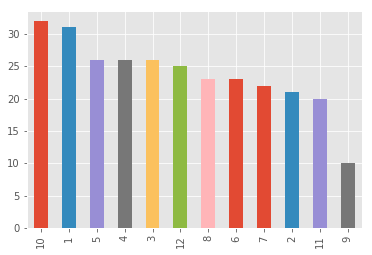

In [20]:
female = shooting[shooting.gender == 'Female']
l = female.date.dt.month.value_counts().plot(kind = 'bar')


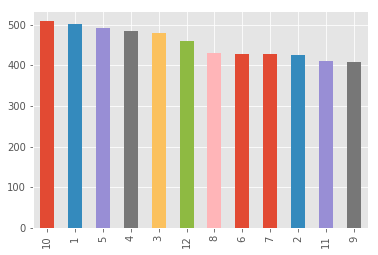

In [24]:
l = male.date.dt.month.value_counts().plot(kind = 'bar')
ll = female.date.dt.month.value_counts().plot(kind = 'bar')

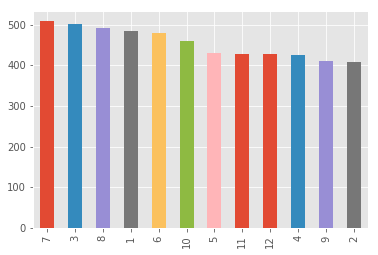

In [23]:
male = shooting[shooting.gender == 'Male']
l = male.date.dt.month.value_counts().plot(kind = 'bar')

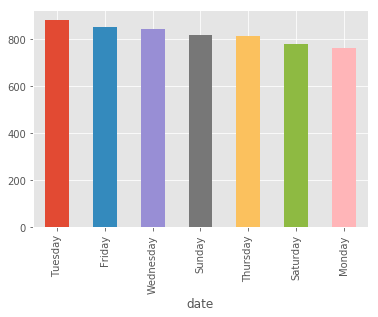

In [25]:
l = shooting.groupby(shooting.date.dt.day_name())['gender'].count().sort_values(ascending = False).plot(kind = 'bar')

In [26]:
female.date.dt.day_name().value_counts()

Tuesday      54
Sunday       45
Thursday     42
Friday       40
Saturday     38
Wednesday    37
Monday       29
Name: date, dtype: int64

In [27]:
male.date.dt.day_name().value_counts()

Tuesday      825
Friday       811
Wednesday    804
Sunday       772
Thursday     772
Saturday     741
Monday       730
Name: date, dtype: int64

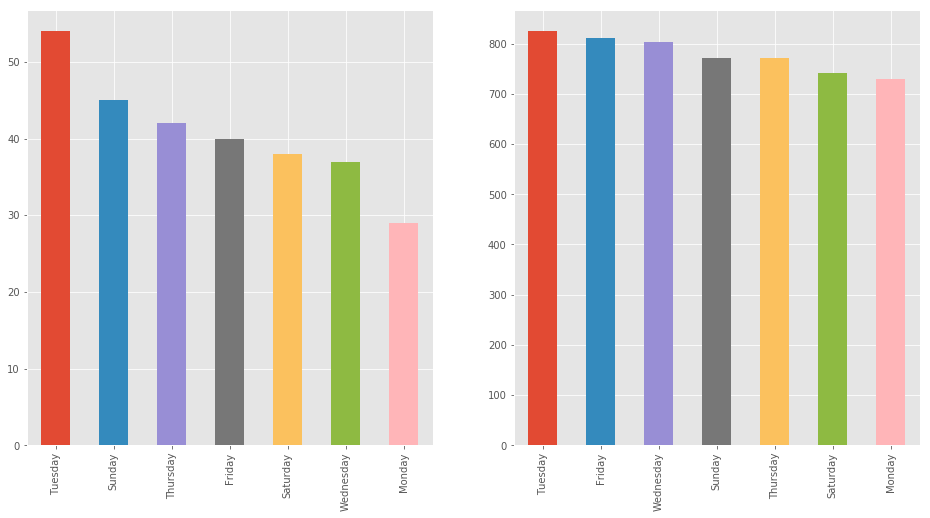

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
female.date.dt.day_name().value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
male.date.dt.day_name().value_counts().plot(kind = 'bar')

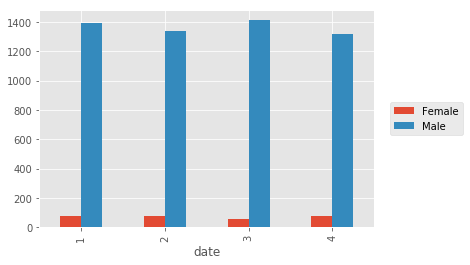

In [33]:
months = shooting.date.dt.month_name()
months.value_counts()
shooting.groupby([ shooting.date.dt.quarter, 'gender'])['year'].count().unstack().plot(kind = 'bar')
plt.legend(loc='center right' , bbox_to_anchor=(1.28, 0.5))

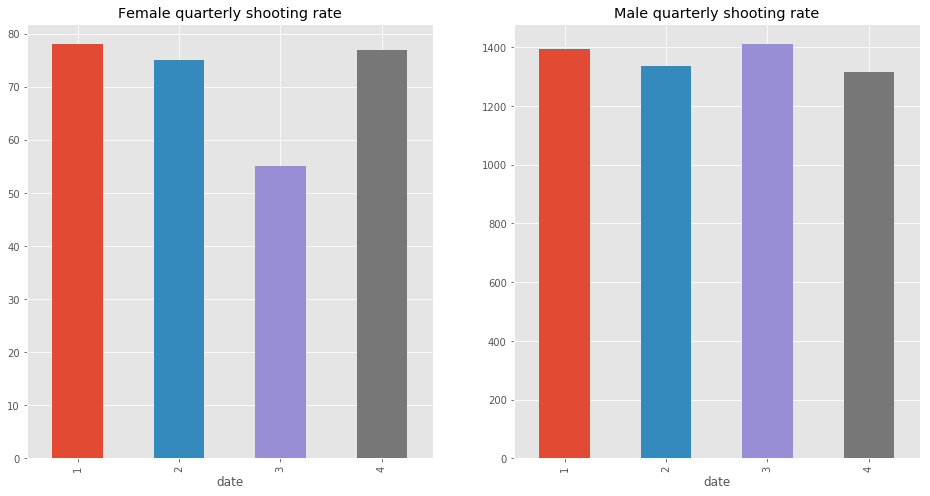

In [34]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
l = female.groupby([female.date.dt.quarter])['year'].count().plot(kind = 'bar')
plt.title('Female quarterly shooting rate')
plt.subplot(1,2,2)
ll = male.groupby(male.date.dt.quarter)['year'].count().plot(kind = 'bar')
m = plt.title('Male quarterly shooting rate')

In [98]:
def percentage (part , whole) : 
    return 100 * part / whole


In [35]:
shooting.armed.value_counts()

armed           4022
unarmed         1655
undetermined      63
Name: armed, dtype: int64

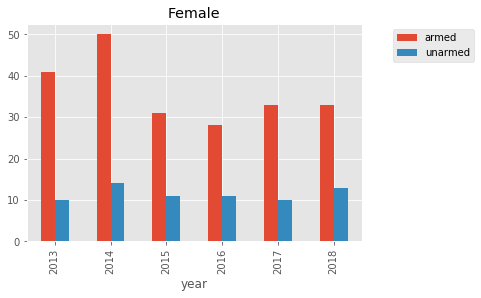

In [36]:
l = female.groupby(['year', 'armed'])['gender'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.35, 1))
ll = plt.title('Female')

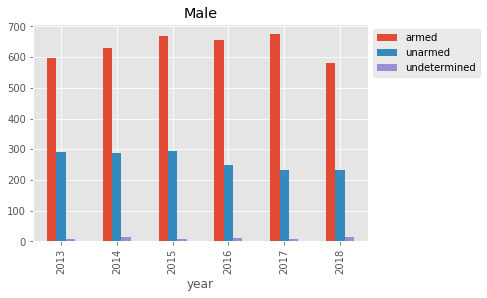

In [37]:
l = male.groupby(['year', 'armed'])['gender'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.35, 1))
ll = plt.title('Male')

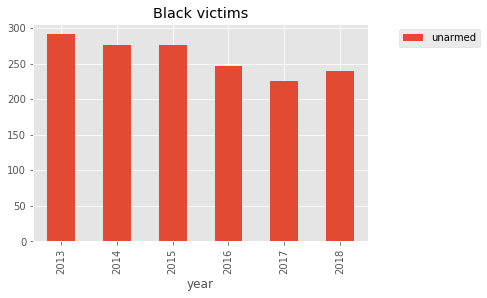

In [40]:
#plt.subplot(nrows = 3,ncols=1)
shooting[shooting.race == 'B'].groupby(['year', 'armed'])['race'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.35, 1))
ll = plt.title('Black victims')

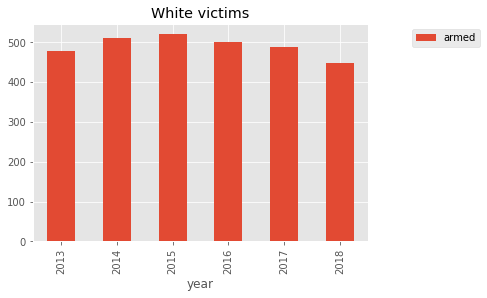

In [41]:
shooting[shooting.race == 'W'].groupby(['year', 'armed'])['race'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.35, 1))
ll = plt.title('White victims')

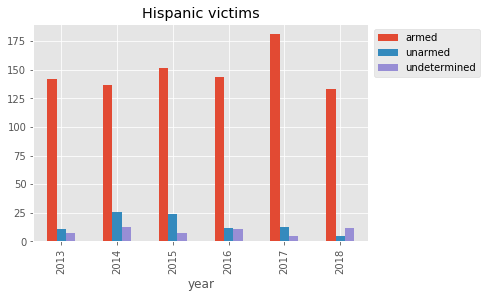

In [43]:
shooting[shooting.race == 'H'].groupby(['year', 'armed'])['race'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.35, 1))
ll = plt.title('Hispanic victims')

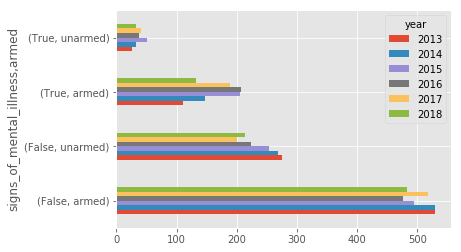

In [44]:
ax = shooting[(shooting.armed == 'armed') | (shooting.armed == 'unarmed')].groupby( ['signs_of_mental_illness' , 'armed'])['year'].value_counts().unstack().plot(kind = 'barh' )


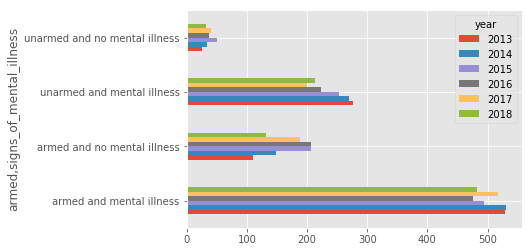

In [46]:
#rows = {'armed and mental illness' , 'armed and no mental illness' , 'unarmed and mental illness' , 'unarmed and no mental illness'}
ax = shooting[(shooting.armed == 'armed') | (shooting.armed == 'unarmed')].groupby(['armed' , 'signs_of_mental_illness' ])['year'].value_counts().unstack().plot(kind = 'barh' )
l = ax.set_yticklabels(['armed and mental illness' , 'armed and no mental illness' , 'unarmed and mental illness' , 'unarmed and no mental illness'])



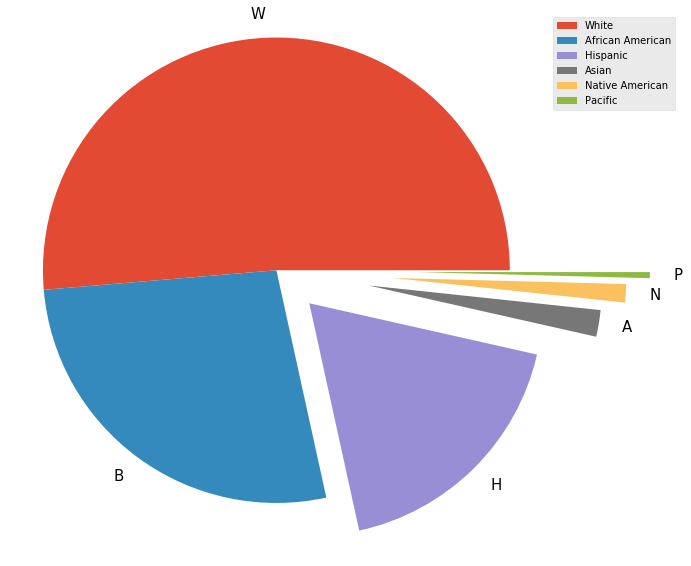

In [841]:
plt.figure(figsize=(12,10))
explode = (0, 0, 0.2, 0.4, 0.5,0.6)
shooting.race.value_counts(dropna=False).plot(kind = 'pie' , explode = explode , fontsize = 15)
plt.axis('equal')
_ = plt.ylabel('')
l = plt.legend(['White' , 'African American' , 'Hispanic' , 'Asian' , 'Native American' , 'Pacific'])

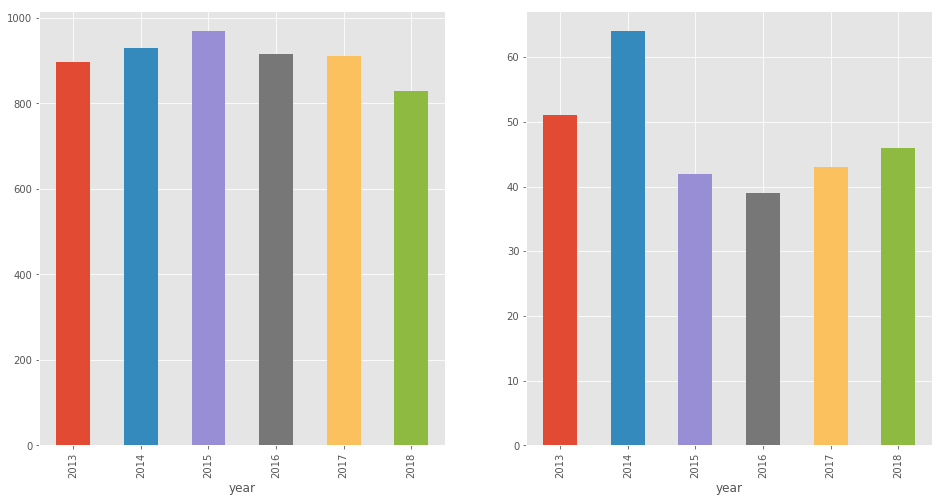

In [51]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
male.groupby('year')['city'].count().plot(kind = 'bar')
plt.subplot(1, 2, 2)
female.groupby('year')['city'].count().plot(kind = 'bar')
plt.show()

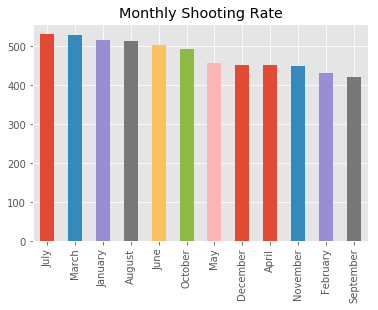

In [839]:
#shooting['date'] = pd.to_datetime(shooting['date'])
_ = shooting.date.dt.month_name().value_counts().plot(kind = 'bar')
plt.title('Monthly Shooting Rate')
plt.show()

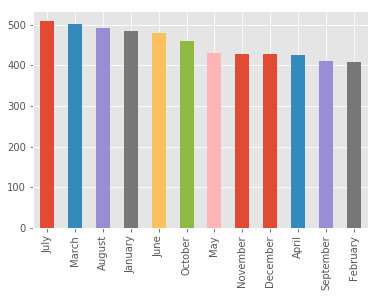

In [52]:
_ = male.date.dt.month_name().value_counts().plot(kind = 'bar')


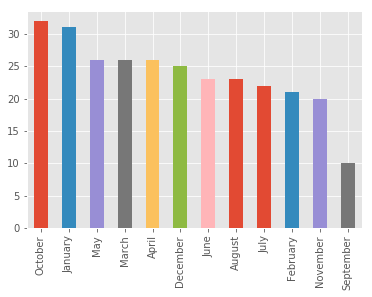

In [53]:
_ = female.date.dt.month_name().value_counts().plot(kind = 'bar')

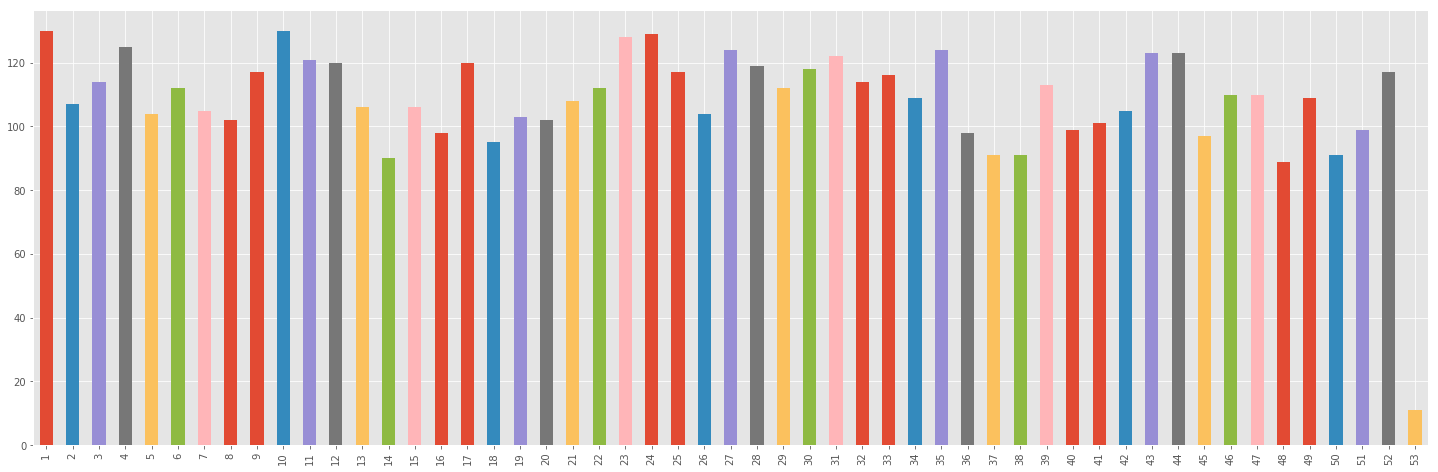

In [54]:
fig = plt.figure(figsize = (25, 8))
_ = shooting.date.dt.week.value_counts().sort_index().plot(kind = 'bar')

In [55]:
shooting.date.dt.is_month_end.value_counts()

False    5573
True      167
Name: date, dtype: int64

In [56]:
shooting.date.dt.is_month_start.value_counts()

False    5565
True      175
Name: date, dtype: int64

In [57]:
shooting.head(1)

,date,age,city,state,threat_level,flee,body_camera,gender,race,armed,...,year,Median Income,share_white,share_black,share_native_american,share_asian,share_hispanic,percent_completed_hs,poverty_rate,month
0,2014-06-07,31,east knoxville,TN,threat,not_fleeing,False,Male,B,unarmed,...,2014,34226.0,0.76,0.17,0.0,0.02,0.05,87.8,25.7,June


In [58]:
shooting[['body_camera' , 'daysofweek','threat_level']].groupby(['body_camera' , 'daysofweek']).count()

threat_level
body_camera daysofweek              
False       Friday               794
            Monday               701
            Saturday             711
            Sunday               762
            Thursday             758
            Tuesday              820
            Wednesday            779
True        Friday                57
            Monday                58
            Saturday              68
            Sunday                55
            Thursday              56
            Tuesday               59
            Wednesday             62

In [60]:
shooting[['body_camera' , 'daysofweek','threat_level']].groupby(['body_camera' , 'daysofweek']).count()

threat_level
body_camera daysofweek              
False       Friday               794
            Monday               701
            Saturday             711
            Sunday               762
            Thursday             758
            Tuesday              820
            Wednesday            779
True        Friday                57
            Monday                58
            Saturday              68
            Sunday                55
            Thursday              56
            Tuesday               59
            Wednesday             62

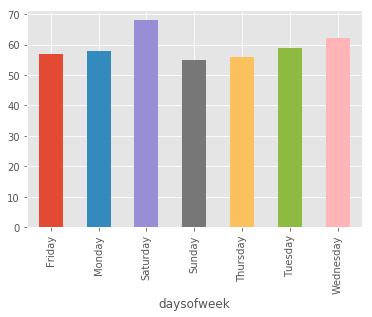

In [61]:
s = shooting[shooting.body_camera == True].groupby('daysofweek')['year'].count().plot(kind = 'bar')

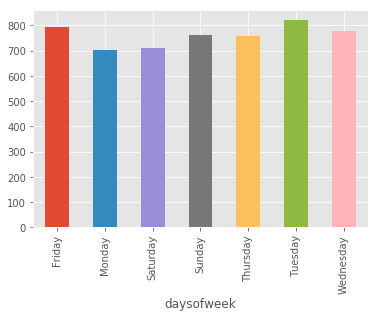

In [62]:
s = shooting[shooting.body_camera == False].groupby('daysofweek')['year'].count().plot(kind = 'bar')

In [65]:
pd.pivot_table(shooting , index=['Age_range' , 'race'], values= 'signs_of_mental_illness' ,aggfunc = 'count')


signs_of_mental_illness
Age_range race                         
13 - 19   B                         131
          H                          75
          N                           7
          W                          99
20 - 35   A                          99
          B                         904
          H                         592
          N                          46
          P                          12
          W                        1155
36 - 49   A                           5
          B                         366
          H                         274
          N                          16
          P                           7
          W                         938
50 - 64   A                           2
          B                         123
          H                          80
          N                           4
          P                           5
          W                         606
Over 65   B                          29
          H                          14
          W                         142
Under 12  B                           2
          W                           7

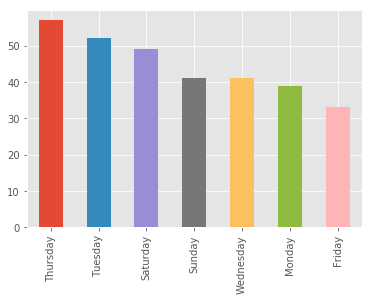

In [66]:
s = shooting[shooting.Age_range == '13 - 19']['daysofweek'].value_counts().plot(kind = 'bar')

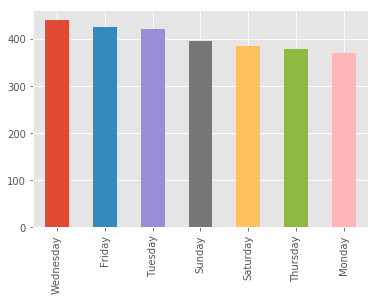

In [67]:
s = shooting[shooting.Age_range == '20 - 35']['daysofweek'].value_counts().plot(kind = 'bar')

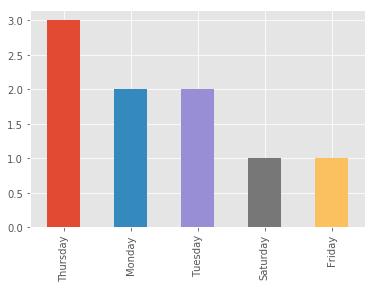

In [68]:
s = shooting[shooting.Age_range == 'Under 12']['daysofweek'].value_counts().plot(kind = 'bar')

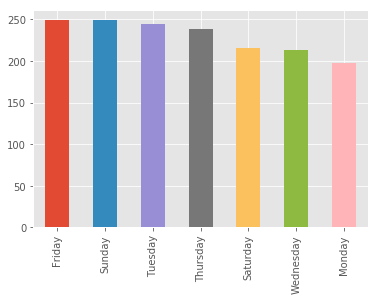

In [69]:
s = shooting[shooting.Age_range == '36 - 49']['daysofweek'].value_counts().plot(kind = 'bar')

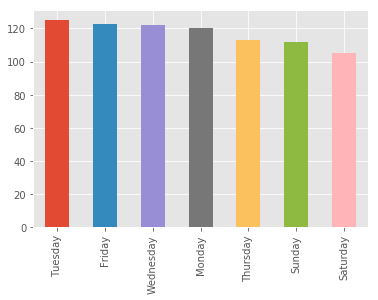

In [70]:
s = shooting[shooting.Age_range == '50 - 64']['daysofweek'].value_counts().plot(kind = 'bar')

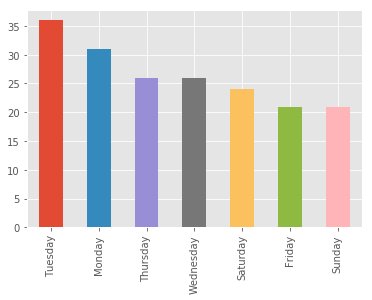

In [72]:
s = shooting[shooting.Age_range == 'Over 65']['daysofweek'].value_counts().plot(kind = 'bar')

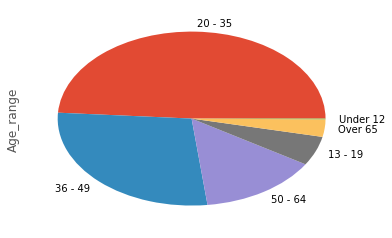

In [73]:
p = shooting['Age_range'].value_counts().plot(kind = 'pie')

In [74]:
shooting.groupby('race').age.describe().sort_values(by = 'count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
W,2947.0,39.963013,13.692890,5.0,29.0,38.0,50.0,91.0
B,1555.0,32.763344,12.117053,1.0,24.0,30.0,39.0,107.0
H,1035.0,33.330435,10.958555,13.0,25.0,32.0,39.0,80.0
A,106.0,34.547170,4.145295,32.0,34.0,34.0,34.0,62.0
N,73.0,31.246575,9.451309,14.0,24.0,30.0,36.0,61.0
P,24.0,37.333333,11.059785,22.0,29.0,35.5,43.0,61.0


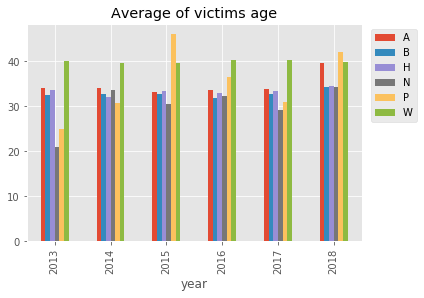

In [75]:

round(shooting.groupby(['year' , 'race'])['age'].mean(), 2).unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.18, 1))
ll = plt.title('Average of victims age')

In [76]:
round(shooting.groupby(['year' , 'race'])['age'].mean(), 2).unstack()

race,A,B,H,N,P,W
year,,,,,,
2013,34.00,32.45,33.66,21.00,25.00,40.10
2014,34.00,32.70,31.99,33.60,30.75,39.58
2015,33.27,32.75,33.47,30.44,46.00,39.63
2016,33.56,31.77,32.93,32.38,36.50,40.32
2017,33.78,32.64,33.50,29.27,31.00,40.35
2018,39.73,34.38,34.60,34.31,42.10,39.82


In [77]:
shooting.groupby(['Age_range' , 'year'])['race'].count().unstack()#.plot(kind = 'bar')

year,2013,2014,2015,2016,2017,2018
Age_range,,,,,,
13 - 19,56.0,53.0,54.0,51.0,52.0,46.0
20 - 35,479.0,492.0,505.0,456.0,477.0,399.0
36 - 49,245.0,271.0,279.0,279.0,251.0,281.0
50 - 64,129.0,142.0,149.0,143.0,141.0,116.0
Over 65,38.0,32.0,23.0,25.0,33.0,34.0
Under 12,2.0,4.0,1.0,1.0,1.0,NaN


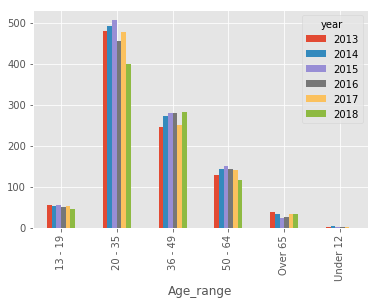

In [78]:
a = shooting.groupby(['Age_range' , 'year'])['race'].count().unstack().plot(kind = 'bar')

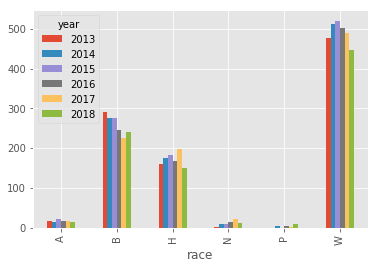

In [79]:
r = shooting.groupby(['race' , 'year'])['Age_range'].count().unstack().plot(kind = 'bar')

In [80]:
shooting.groupby(['Age_range', 'race']).Age_range.count().unstack()

race,A,B,H,N,P,W
Age_range,,,,,,
13 - 19,NaN,131.0,75.0,7.0,NaN,99.0
20 - 35,99.0,904.0,592.0,46.0,12.0,1155.0
36 - 49,5.0,366.0,274.0,16.0,7.0,938.0
50 - 64,2.0,123.0,80.0,4.0,5.0,606.0
Over 65,NaN,29.0,14.0,NaN,NaN,142.0
Under 12,NaN,2.0,NaN,NaN,NaN,7.0


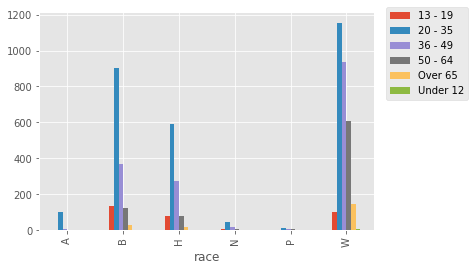

In [81]:
r = shooting.groupby([ 'race', 'Age_range']).Age_range.count().unstack().plot(kind = 'bar')
rr = plt.legend(bbox_to_anchor=(1.02, 1.05))

In [82]:
shooting.groupby([shooting.date.dt.year , 'race']).Age_range.value_counts().sort_values(ascending =False).head()

date  race  Age_range
2014  W     20 - 35      207
2015  W     20 - 35      203
2017  W     20 - 35      196
2013  W     20 - 35      194
2016  W     20 - 35      184
Name: Age_range, dtype: int64

In [83]:
shooting.groupby( 'race').Age_range.value_counts().sort_values(ascending =False).head()

race  Age_range
W     20 - 35      1155
      36 - 49       938
B     20 - 35       904
W     50 - 64       606
H     20 - 35       592
Name: Age_range, dtype: int64

In [539]:
shooting[shooting.Age_range == 'Under 12'].head()

,Unnamed: 0,name,date,manner_of_death,Armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_range,daysofweek,year
830,830,Jeremy Mardis,2015-11-03,shot,unarmed,6.0,M,W,Marksville,LA,False,other,Car,True,Under 12,Tuesday,2015
1007,1007,Ciara Meyer,2016-01-11,shot,unarmed,12.0,F,W,Penn Township,PA,False,other,Not fleeing,False,Under 12,Monday,2016
2863,2863,Kameron Prescott,2017-12-21,shot,unarmed,6.0,M,W,Schertz,TX,False,other,Not fleeing,False,Under 12,Thursday,2017
3365,3365,Tamir E. Rice,2014-11-22,Gunshot,unarmed,12.0,M,B,Cleveland,OH,False,NaN,NaN,NaN,Under 12,Saturday,2014
3708,3708,Cadence Harris,2014-07-18,Gunshot,unarmed,5.0,F,W,Leavenworth,KS,False,NaN,NaN,NaN,Under 12,Friday,2014


In [88]:
shooting.groupby(['daysofweek',  'race'])['body_camera'].count().unstack('race')

race,A,B,H,N,P,W
daysofweek,,,,,,
Friday,16,223,146,10,7,449
Monday,10,211,137,8,2,391
Saturday,17,204,137,11,3,407
Sunday,16,222,154,10,3,412
Thursday,14,226,171,8,3,392
Tuesday,13,218,153,13,4,478
Wednesday,20,251,137,13,2,418


In [90]:
weekend = shooting[(shooting.daysofweek == 'Saturday') | (shooting.daysofweek == 'Sunday')]
weekdays = shooting[~(shooting.daysofweek == 'Saturday') | (shooting.daysofweek == 'Sunday')]

In [91]:
weekdays['armed'].value_counts(dropna = False)

armed           3465
unarmed         1440
undetermined      56
Name: armed, dtype: int64

In [92]:
weekend['armed'].value_counts(dropna = False)

armed           1131
unarmed          449
undetermined      16
Name: armed, dtype: int64

In [110]:
unarmed_weekend = weekend[weekend.armed == 'unarmed']
armed_weekend = weekend[~(weekend.armed == 'unarmed')]

unarmed_weekdays = weekdays[weekdays.armed == 'unarmed']
armed_weekdays = weekdays[~(weekdays.armed == 'unarmed')]

In [95]:
weekend['year'] = weekend.date.dt.year
weekdays['year'] = weekdays.date.dt.year

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


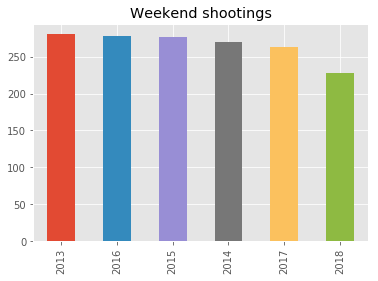

In [96]:
weekend.year.value_counts().plot(kind = 'bar')
w = plt.title('Weekend shootings')

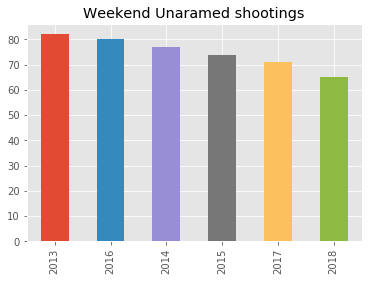

In [97]:
unarmed_weekend['year'].value_counts().plot(kind = 'bar')
u = plt.title('Weekend Unaramed shootings')

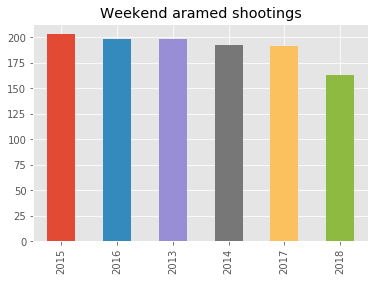

In [98]:
armed_weekend['year'].value_counts().plot(kind = 'bar')
u = plt.title('Weekend aramed shootings')

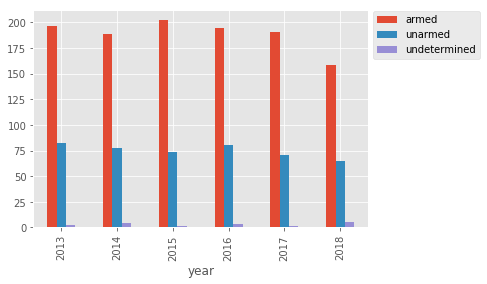

In [100]:
weekend.groupby('year')['armed'].value_counts().unstack().plot(kind = 'bar')
rr = plt.legend(bbox_to_anchor=(1., 1.02))

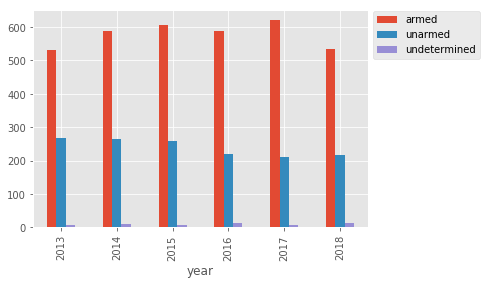

In [101]:
weekdays.groupby('year')['armed'].value_counts().unstack().plot(kind = 'bar')
rr = plt.legend(bbox_to_anchor=(1., 1.02))

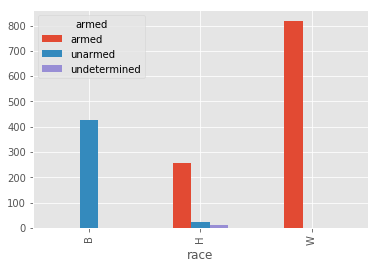

In [102]:
weekend = weekend[(weekend.race == 'B')| (weekend.race == 'W') | (weekend.race == 'H')]
w = weekend.groupby([ 'race', 'armed'])['race'].count().unstack().plot(kind = 'bar')

In [103]:
weekend.groupby([ 'race', 'armed'])['race'].count().unstack()

armed,armed,unarmed,undetermined
race,,,
B,NaN,426.0,NaN
H,256.0,22.0,13.0
W,819.0,NaN,NaN


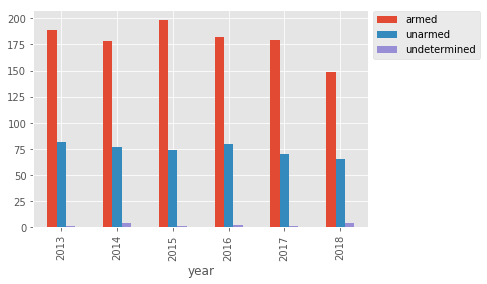

In [104]:
w = weekend.groupby(['year' , 'armed'])['year'].count().unstack().plot(kind = 'bar')
rr = plt.legend(bbox_to_anchor=(1., 1.02))

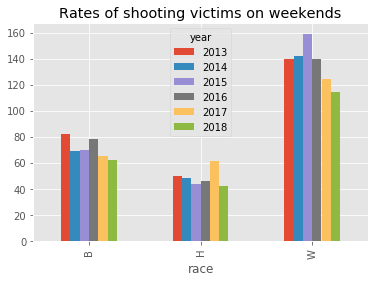

In [105]:
w = weekend.groupby(['race' , 'year'])['year'].count().unstack().plot(kind = 'bar')
l = plt.title('Rates of shooting victims on weekends')

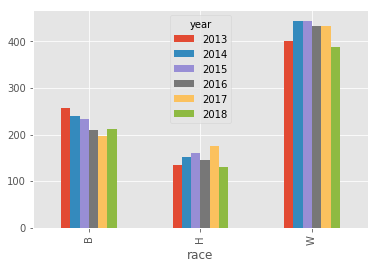

In [106]:

weekdays2 = weekdays[(weekdays.race == 'B')| (weekdays.race == 'W') | (weekdays.race == 'H')]
w2 = weekdays2.groupby(['race' , 'year'])['year'].count().unstack().plot(kind = 'bar')

In [136]:
armed_weekdays[['flee' , 'body_camera']].groupby('flee').count()

,body_camera
flee,
flee,706
not_fleeing,2815


In [139]:
armed_weekdays.groupby([ 'race', 'body_camera']).count()['date'].unstack()

body_camera,False,True
race,,
A,76,8
H,756,62
N,51,7
P,19,2
W,2389,151


In [140]:
unarmed_weekdays.groupby([ 'race', 'body_camera']).count()['date'].unstack()

body_camera,False,True
race,,
A,3,2
B,1240,111
H,77,3
N,3,1


In [141]:
armed_weekend.groupby([ 'race', 'body_camera']).count()['date'].unstack()

body_camera,False,True
race,,
H,249,20
W,770,49


In [142]:
unarmed_weekend.groupby([ 'race', 'body_camera']).count()['date'].unstack()

body_camera,False,True
race,,
B,387,39
H,20,2


In [146]:
shooting.groupby(['year', 'body_camera']).count()['date'].unstack()

body_camera,False,True
year,,
2013,949.0,NaN
2014,994.0,NaN
2015,937.0,74.0
2016,811.0,144.0
2017,857.0,98.0
2018,777.0,99.0


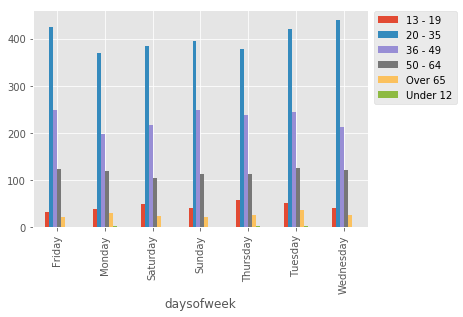

In [150]:
#plt.figure(figsize=(60,12))
#fig = plt.figure()
"""
ax = plt.subplots()
x = shooting['daysofweek']
y = shooting['Age_range']
plt.bar (x, y )
plt.show()
"""
shooting.groupby(['daysofweek' , 'Age_range'])['race'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='center right' , bbox_to_anchor=(1.28, 0.78))
#plot(shooting['daysofweek'] , )
#shooting[shooting.Age_range == '20 - 35']['daysofweek'].value_counts().plot(kind = 'bar')

In [ ]:
shooting[shooting.Age_range== '20 - 35'].groupby(['daysofweek' ])['race'].count().plot(kind = 'bar')

In [842]:
shooting_top = shooting[(shooting.race == 'B') | (shooting.race == 'W') | (shooting.race == 'H')]

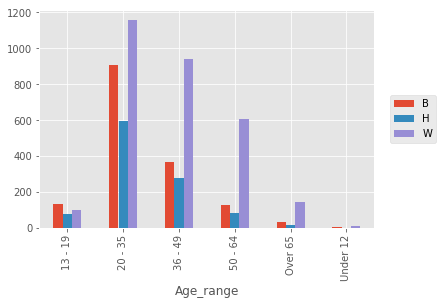

In [843]:
shooting_top.groupby(['Age_range', 'race'])['daysofweek'].count().unstack('race').plot(kind = 'bar')
l = plt.legend(loc='center right' , bbox_to_anchor=(1.2, 0.5))

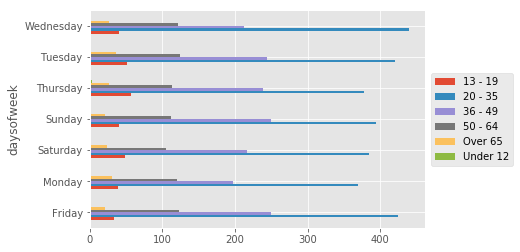

In [154]:
shooting.groupby(['daysofweek' , 'Age_range'])['gender'].count().unstack().plot(kind = 'barh')
l = plt.legend(loc='center right' , bbox_to_anchor=(1.28, 0.5))

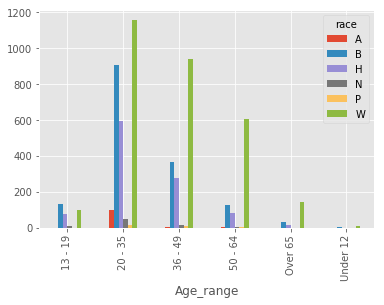

In [155]:
s = shooting.groupby(['Age_range', 'race'])['daysofweek'].count().unstack().plot(kind = 'bar')

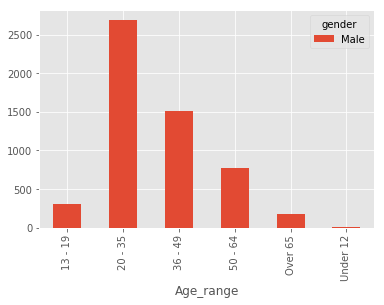

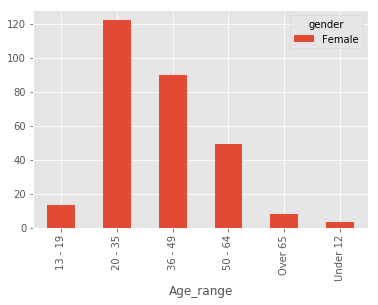

In [157]:

m = male.groupby(['Age_range', 'gender'])['race'].count().unstack().plot(kind = 'bar')

f = female.groupby(['Age_range', 'gender'])['race'].count().unstack().plot(kind = 'bar')

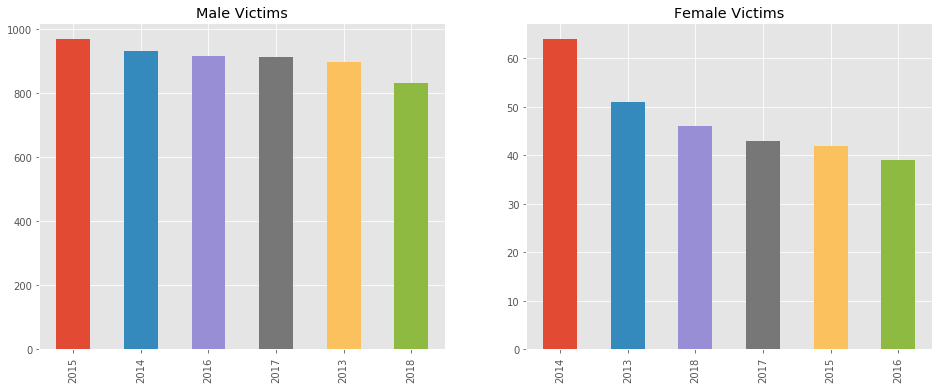

In [159]:
plt.figure(figsize=(16,6))
plt.subplot(1,2 , 1)
l = male['year'].value_counts().plot(kind = 'bar')
l.set_title('Male Victims')
plt.subplot(1,2 , 2)
ll = female['year'].value_counts().plot(kind = 'bar')
ll.set_title('Female Victims')
plt.show()

In [235]:
df4 = df1.merge(df2 , how = 'inner' , on = 'Geographic Area')

In [237]:
df5 = df4.merge(df3 , how = 'inner' , on = 'Geographic Area')

In [518]:
df5.sort_values(by = 'poverty_rate' , ascending= False).head()


,poverty_rate,Median Income,percent_completed_hs
Geographic Area,,,
MS,26.88,35002.10,78.47
AZ,25.67,42495.67,80.47
GA,23.78,40127.56,79.01
NM,23.08,40952.91,80.98
AR,22.96,35593.41,79.95


In [519]:
df5.sort_values(by = 'percent_completed_hs', ascending= False).head()

,poverty_rate,Median Income,percent_completed_hs
Geographic Area,,,
MA,9.59,71765.91,92.40
WY,9.89,60874.99,92.10
HI,13.40,64676.27,91.67
UT,11.98,60216.37,91.62
CT,9.14,75149.65,91.59


In [520]:
df5.sort_values(by = 'Median Income', ascending= False).head()

,poverty_rate,Median Income,percent_completed_hs
Geographic Area,,,
NJ,8.19,80901.07,90.85
MD,10.31,79970.63,88.42
CT,9.14,75149.65,91.59
MA,9.59,71765.91,92.40
DC,18.00,70848.00,89.30


In [160]:

B_offenders = shooting[shooting.race == 'B']['city'].value_counts().head(20)
B_offenders 

chicago          47
new york         34
houston          31
st. louis        29
columbus         26
los angeles      24
baltimore        21
washington       21
philadelphia     20
jacksonville     19
oklahoma city    16
kansas city      15
miami            14
milwaukee        14
indianapolis     13
phoenix          13
memphis          12
orlando          12
atlanta          11
dallas           11
Name: city, dtype: int64

In [161]:
W_offenders = shooting[shooting.race == 'W']['city'].value_counts().head(20)
W_offenders

phoenix          41
las vegas        23
austin           18
tucson           17
los angeles      17
jacksonville     15
albuquerque      15
columbus         15
dallas           14
oklahoma city    13
kansas city      13
mesa             13
tulsa            13
seattle          12
springfield      12
san antonio      11
louisville       11
spokane          11
indianapolis     11
portland         10
Name: city, dtype: int64

In [162]:
H_offenders = shooting[shooting.race == 'H']['city'].value_counts().head(20)
H_offenders

los angeles      41
phoenix          30
albuquerque      23
san antonio      19
tucson           19
houston          18
bakersfield      15
miami            15
fresno           13
san jose         12
las vegas        12
denver           11
santa ana        10
chicago          10
pueblo            8
las cruces        8
burbank           8
san diego         8
oklahoma city     7
orlando           7
Name: city, dtype: int64

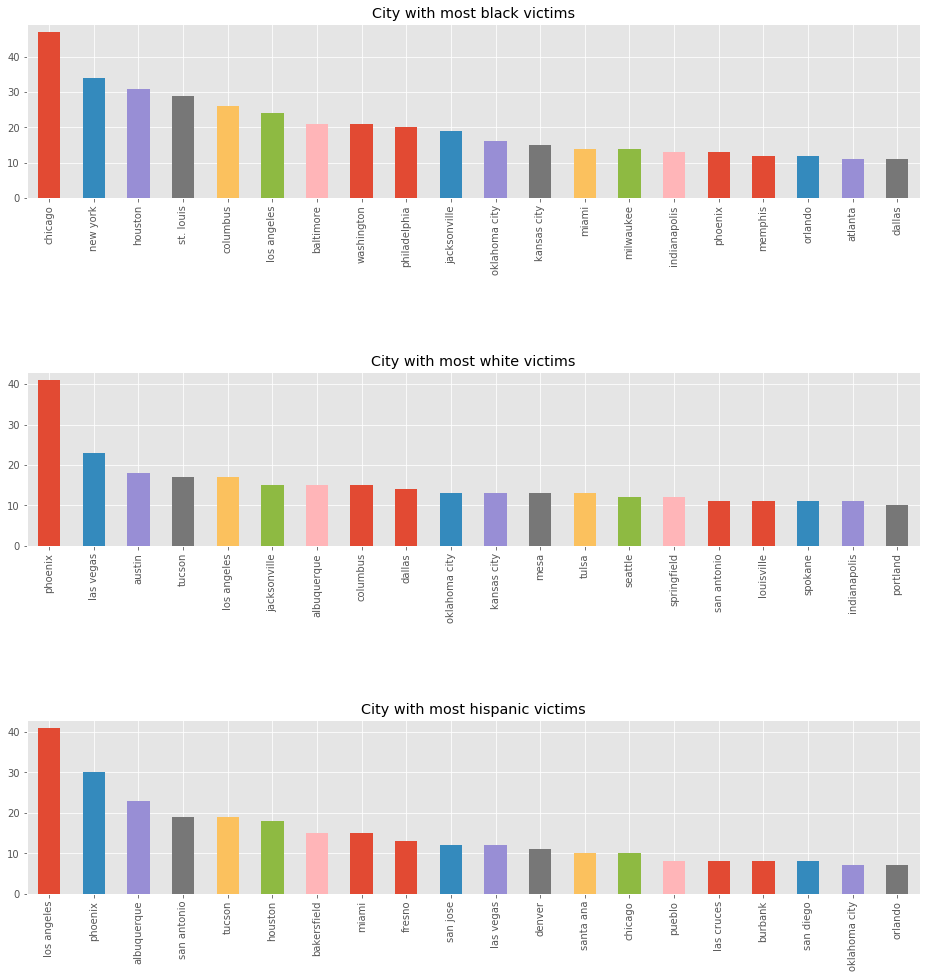

In [164]:
plt.figure(figsize=(16,16))
plt.subplot(3,1 , 1)
plt.subplots_adjust(hspace = 1)
BHC = B_offenders.plot(kind = 'bar')
BHC.set_title('City with most black victims')
plt.subplot(3, 1, 2)
WHC = W_offenders.plot(kind = 'bar')
WHC.set_title('City with most white victims')
plt.subplot(3,1 , 3)
HHC = H_offenders.plot(kind = 'bar')
HHC.set_title('City with most hispanic victims')

plt.show()

In [167]:
top = shooting[(shooting.race =='B' )| (shooting.race =='W' )| (shooting.race =='H' )]
top.groupby('race')['city'].value_counts().head()

race  city     
B     chicago      47
      new york     34
      houston      31
      st. louis    29
      columbus     26
Name: city, dtype: int64

In [171]:
shooting.groupby(['Median Income', 'city' , 'state'])['percent_completed_hs'].count().sort_values(ascending = False).head()

Median Income  city         state
47326.0        phoenix      AZ       88
50205.0        los angeles  CA       84
48522.0        chicago      IL       61
46187.0        houston      TX       58
50202.0        las vegas    NV       48
Name: percent_completed_hs, dtype: int64

In [172]:
np.corrcoef(shooting['Median Income'] , shooting['poverty_rate'])[0,1]
#np.corrcoef


-0.6908376820112677

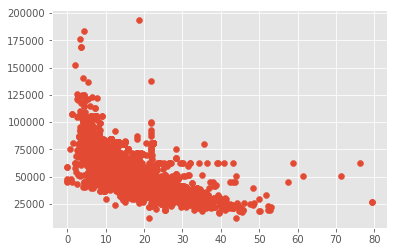

In [173]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = shooting['Median Income']
x = shooting['poverty_rate']
plt.scatter(x, y)
plt.show()

In [313]:
#circum = circum.merge(df7 ,  on = 'state')

In [312]:
#circum.reset_index(inplace= True)
#circum.head()
#del circum['Unnamed: 0']
circum.to_csv('state_circum')

In [474]:
size = shooting[['city' , 'state' ,'Median Income' , 'poverty_rate' , 'percent_completed_hs']].groupby(['city' , 'state' ,'Median Income','poverty_rate' , 'percent_completed_hs']).size()

size_df = pd.DataFrame(size)
size_df.reset_index(inplace=True)
size_df.rename(columns={0 :'no_victims' } , inplace=True)
size_df.head()
size_df.sort_values(by = 'no_victims' , ascending= False).head()


,city,state,Median Income,poverty_rate,percent_completed_hs,no_victims
2011,phoenix,AZ,47326.0,23.1,80.7,88
1491,los angeles,CA,50205.0,22.1,75.5,84
454,chicago,IL,48522.0,22.3,82.3,61
1183,houston,TX,46187.0,22.5,76.7,58
1392,las vegas,NV,50202.0,17.5,83.3,48


In [355]:
size_df.to_csv('Cities_info.csv')

In [356]:
np.corrcoef(size_df['Median Income'] , size_df['no_victims'])[0,1]

-0.02012375464754462

In [333]:
np.corrcoef(size_df['poverty_rate'] , size_df['no_victims'])[0,1]

0.038491546698505096

In [334]:
np.corrcoef(size_df['percent_completed_hs'] , size_df['no_victims'])[0,1]

-0.029922828931928203

In [350]:
circum.head()

,state,poverty_rate,Median Income,percent_completed_hs,no_victims
0,AK,19.85,52099.59,84.63,28
1,AL,20.65,40577.31,80.30,106
2,AR,22.96,35593.41,79.95,58
3,AZ,25.67,42495.67,80.47,246
4,CA,17.12,62652.87,81.96,836


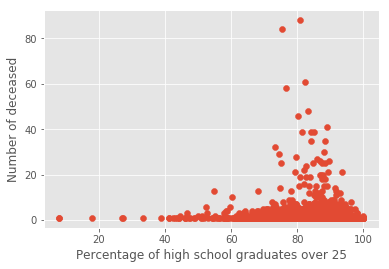

In [483]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = size_df.no_victims
x = size_df.percent_completed_hs
#y = top_cities.no_victims
#x = top_cities.percent_completed_hs
plt.scatter(x, y)
plt.xlabel('Percentage of high school graduates over 25')
plt.ylabel('Number of deceased')
plt.show()

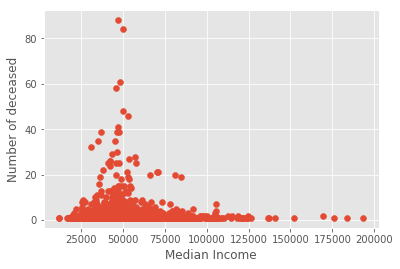

In [482]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = size_df.no_victims
x = size_df['Median Income']
#y = top_cities.no_victims
#x = top_cities['Median Income']
plt.scatter(x, y)
plt.xlabel('Median Income')
plt.ylabel('Number of deceased')
plt.show()

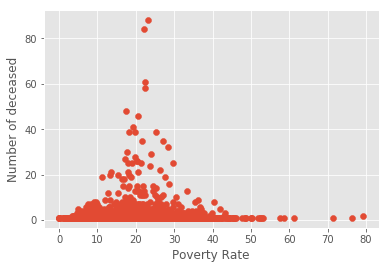

In [481]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = size_df.no_victims
x = size_df['poverty_rate']
#y = top_cities.no_victims
#x = top_cities['poverty_rate']
plt.scatter(x, y)
plt.xlabel('Poverty Rate')
plt.ylabel('Number of deceased')
plt.show()

In [17]:
state_df = pd.DataFrame(shooting['state'].value_counts())
state_df.reset_index(inplace = True)
state_df.rename(columns = {'index' : 'state' , 'state' : 'no_victims'}, inplace= True)


In [15]:
state_df.head()

,state,no_victims
0,CA,904
1,TX,488
2,FL,402
3,AZ,280
4,GA,181


In [6]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [16]:
# Import libraries
import pandas as pd
import folium
import requests


state_geo = pd.read_json('states.json')


# Initialize the map:
m = folium.Map(location=[39, -97], zoom_start=4.5)

m.choropleth(geo_path='states.json', data=state_df,
             columns=['state', 'no_victims'],
             key_on='feature.id',
             fill_color='PuRd', fill_opacity=0.8, line_opacity=0.2,
             threshold_scale = [0 ,50 , 100 , 200 , 400 , 904],
             legend_name='Demographic Distribution')

folium.LayerControl().add_to(m)
#m.save('police-shooting.html')


m

In [19]:
top_cities.info() #= pd.read_csv('Cities_info_long_lat.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
Unnamed: 0              53 non-null int64
city                    53 non-null object
state                   53 non-null object
Median Income           53 non-null float64
poverty_rate            53 non-null float64
percent_completed_hs    53 non-null float64
no_victims              53 non-null int64
LON                     53 non-null float64
LAT                     53 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.8+ KB


In [20]:

import folium
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot') 

# Add marker one by one on the map
for i in range(0,len(top_cities)):
    folium.CircleMarker(
      location=[top_cities.iloc[i]['LAT'] , top_cities.iloc[i]['LON'] * -1],
      popup=top_cities.iloc[i]['city'],
      radius=top_cities.iloc[i]['no_victims']*1000,
      fill_opacity=0.56,
      color='black',
      fill_color='purple').add_to(m)

m

In [21]:
# Import libraries
import pandas as pd
import folium
import requests


state_geo = pd.read_json('states.json')


# Initialize the map:
m = folium.Map(location=[39, -97], zoom_start=4.5)

m.choropleth(geo_path='states.json', data=state_df,
             columns=['state', 'no_victims'],
             key_on='feature.id',
             fill_color='PuRd', fill_opacity=0.8, line_opacity=0.2,
             threshold_scale = [0 ,50 , 100 , 200 , 400 , 904],
             legend_name='Demographic Distribution')

folium.LayerControl().add_to(m)


m

In [22]:

import folium
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot') 


Black_city_Top_off = pd.read_csv('Top_Black_cities.csv')

# Add marker one by one on the map
for i in range(0,len(Black_city_Top_off)):
    folium.CircleMarker(
      location=[Black_city_Top_off.iloc[i]['LAT'] , Black_city_Top_off.iloc[i]['LON'] * -1],
      popup=Black_city_Top_off.iloc[i]['city'],
      radius=Black_city_Top_off.iloc[i]['B']*1500,
      fill_opacity=0.7,
      color='black',
      fill_color='crimson').add_to(m)


m

In [31]:
# Import libraries
import pandas as pd
import folium
import requests


state_geo = pd.read_json('states.json')


# Initialize the map:
m = folium.Map(location=[39, -97], zoom_start=4.5)

m.choropleth(geo_path='states.json', data=state_df,
             columns=['state', 'no_victims'],
             key_on='feature.id',
             fill_color='PuRd', fill_opacity=0.8, line_opacity=0.2,
             threshold_scale = [0 ,50 , 100 , 200 , 400 , 904],
             legend_name='Demographic Distribution')

folium.LayerControl().add_to(m)


m

In [32]:

import folium
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot') 


White_city_Top_off = pd.read_csv('Top_White_cities.csv')

# Add marker one by one on the map
for i in range(0,len(White_city_Top_off)):
    folium.CircleMarker(
      location=[White_city_Top_off.iloc[i]['LAT'] , White_city_Top_off.iloc[i]['LON'] * -1],
      popup=White_city_Top_off.iloc[i]['city'],
      radius=White_city_Top_off.iloc[i]['W']*1500,
      color = 'white',
      fill_opacity=0.7,
      fill_color='yellow').add_to(m)
m

In [27]:
# Import libraries
import pandas as pd
import folium
import requests


state_geo = pd.read_json('states.json')


# Initialize the map:
m = folium.Map(location=[39, -97], zoom_start=4.5)

m.choropleth(geo_path='states.json', data=state_df,
             columns=['state', 'no_victims'],
             key_on='feature.id',
             fill_color='PuRd', fill_opacity=0.8, line_opacity=0.2,
             threshold_scale = [0 ,50 , 100 , 200 , 400 , 904],
             legend_name='Demographic Distribution')

folium.LayerControl().add_to(m)



m

In [28]:
import folium
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot') 


Hispanic_city_Top_off = pd.read_csv('Top_Hispanic_cities.csv')

# Add marker one by one on the map
for i in range(0,len(Hispanic_city_Top_off)):
    folium.CircleMarker(
      location=[Hispanic_city_Top_off.iloc[i]['LAT'] , Hispanic_city_Top_off.iloc[i]['LON'] * -1],
      popup=Hispanic_city_Top_off.iloc[i]['city'],
      radius=Hispanic_city_Top_off.iloc[i]['H']*1500,
      color = 'white',
      fill_opacity=0.75,
      fill_color='green').add_to(m)
m

In [753]:
circum.sort_values(by = 'no_victims').head(10)

,state,poverty_rate,Median Income,percent_completed_hs,no_victims
39,RI,10.37,64537.54,88.83,5
46,VT,13.79,46284.78,89.98,8
28,ND,12.16,52141.71,87.82,9
30,NH,12.66,54026.32,90.71,12
8,DE,12.56,61792.41,88.52,14
50,WY,9.89,60874.99,92.10,15
41,SD,16.03,45408.26,87.75,16
11,HI,13.40,64676.27,91.67,16
7,DC,18.00,70848.00,89.30,20
6,CT,9.14,75149.65,91.59,22


In [611]:
top = shooting[(shooting.race =='B' )| (shooting.race =='W' )| (shooting.race =='H' )]

In [697]:

#B1_City_top_off = top.groupby('race')['city'].value_counts().unstack().transpose().sort_values(by = 'B' , ascending = False).head(20)
B1_City_top_off =top.groupby(['city' , 'state'])['race'].value_counts().unstack().sort_values(by = 'B' , ascending = False).head(20)
B1_City_top_off.to_csv('Black_city_Top_off.csv', index= True)

In [698]:
W1_City_top_off = top.groupby(['city' , 'state'])['race'].value_counts().unstack().sort_values(by = 'W' , ascending = False).head(20)
W1_City_top_off.to_csv('White_city_Top_off.csv' , index= True)

In [699]:
H1_City_top_off = top.groupby(['city' , 'state'])['race'].value_counts().unstack().sort_values(by = 'H' , ascending = False).head(20)
H1_City_top_off.to_csv('Hispanic_city_Top_off.csv' , index= True)

In [630]:
top1_off_cities = pd.concat([B1_City_top_off , W1_City_top_off , H1_City_top_off])
top1_off_cities.drop_duplicates(inplace= True)
top1_off_cities['total'] = top_off_cities.sum(axis = 1)
top1_off_cities.sort_values(by = 'total' , inplace= True , ascending= True)

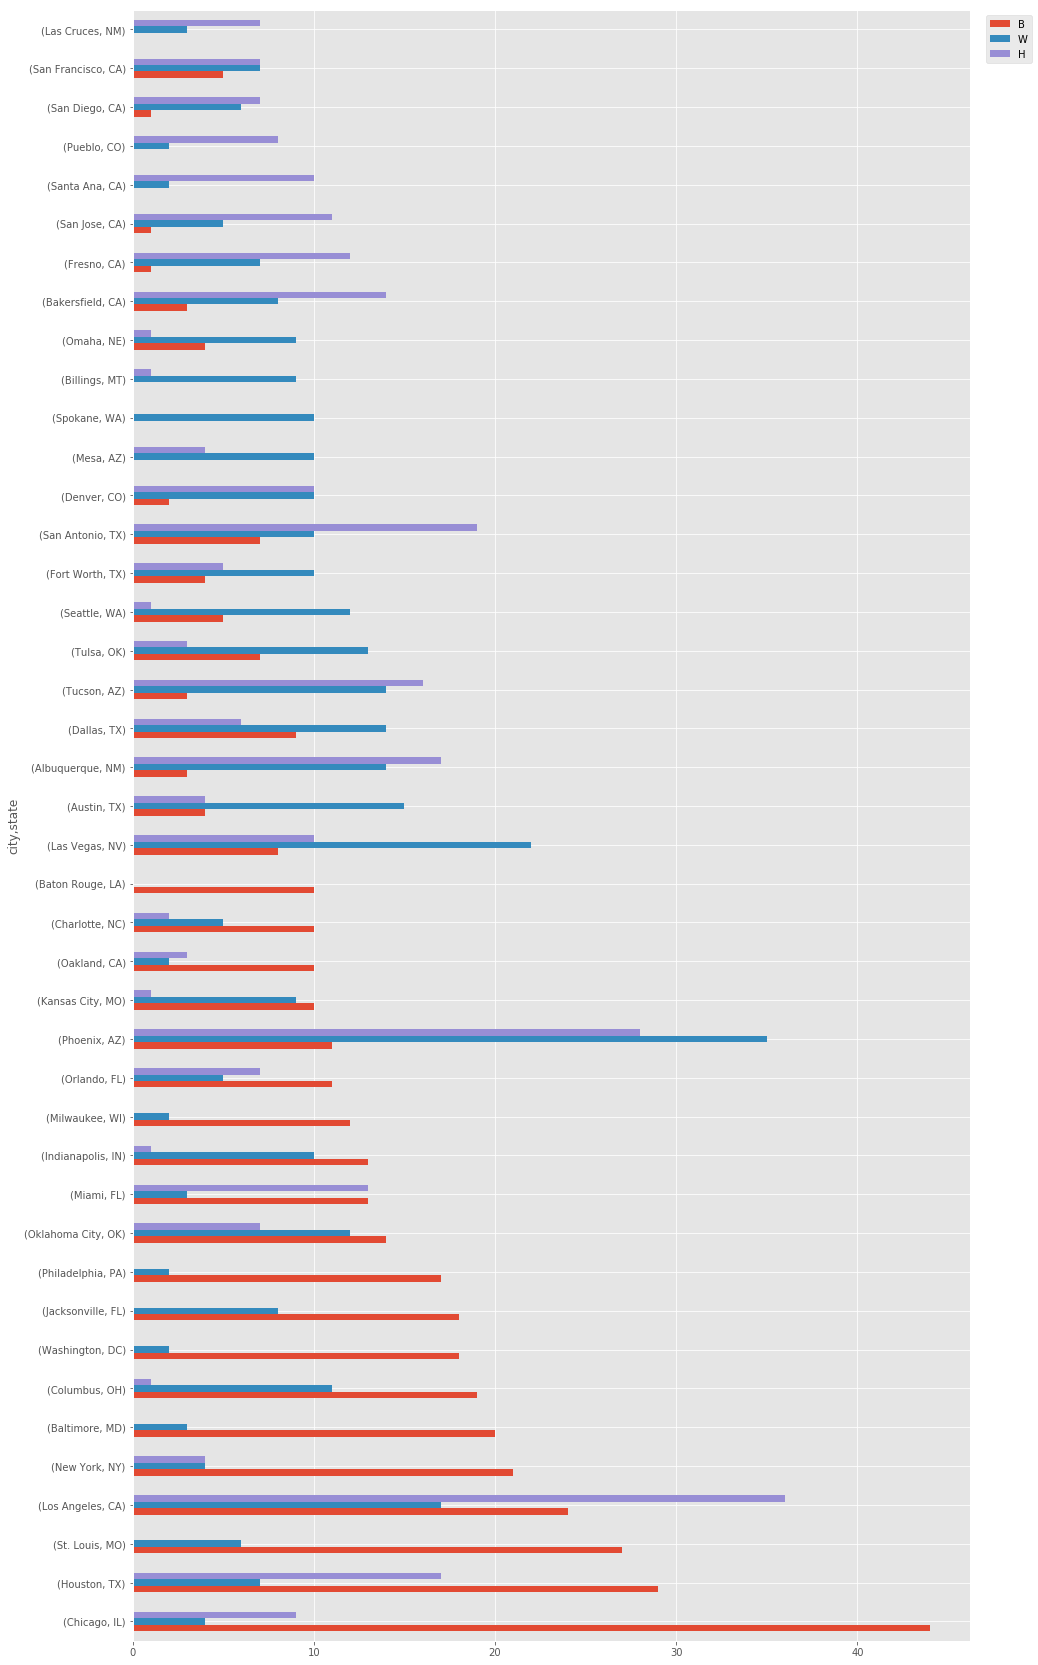

In [631]:
top1_off_cities[['B' , 'W' , 'H']].plot(kind = 'barh', figsize=(15, 30))
plt.legend(loc='upper right' , bbox_to_anchor=(1.08, 1))

In [658]:
top1_off_cities['total'] = top1_off_cities[['B' , 'H' , 'W']].sum(axis = 1)

In [669]:
top1_off_cities.drop_duplicates(inplace=True)

In [670]:
top1_off_cities.to_csv('top1_off_cities.csv' , index= True )

In [672]:
B_state_off = top.groupby('race')['state'].value_counts().unstack().transpose().sort_values(by = 'B' , ascending = False).head(10)
B_state_off

race,B,H,W
state,,,
CA,147.0,357.0,285.0
FL,126.0,45.0,186.0
TX,103.0,140.0,198.0
IL,71.0,16.0,40.0
GA,65.0,8.0,82.0
OH,60.0,1.0,88.0
NC,59.0,6.0,77.0
LA,57.0,4.0,44.0
MO,53.0,3.0,74.0


In [673]:
W_state_off = top.groupby('race')['state'].value_counts().unstack().transpose().sort_values(by = 'W' , ascending = False).head(10)
W_state_off

race,B,H,W
state,,,
CA,147.0,357.0,285.0
TX,103.0,140.0,198.0
FL,126.0,45.0,186.0
AZ,24.0,84.0,130.0
WA,18.0,18.0,89.0
OH,60.0,1.0,88.0
TN,26.0,2.0,87.0
OK,37.0,13.0,82.0
GA,65.0,8.0,82.0


In [674]:
H_state_off = top.groupby('race')['state'].value_counts().unstack().transpose().sort_values(by = 'H' , ascending = False).head(10)
H_state_off

race,B,H,W
state,,,
CA,147.0,357.0,285.0
TX,103.0,140.0,198.0
AZ,24.0,84.0,130.0
NM,4.0,56.0,35.0
CO,16.0,46.0,67.0
FL,126.0,45.0,186.0
NV,14.0,20.0,53.0
WA,18.0,18.0,89.0
IL,71.0,16.0,40.0


In [675]:
top_off_state = pd.concat([B_state_off , W_state_off , H_state_off])
top_off_state.drop_duplicates(inplace=True)
top_off_state['total']=top_off_state.sum(axis=1)
top_off_state.sort_values(by = 'total' , inplace= True , ascending= False)

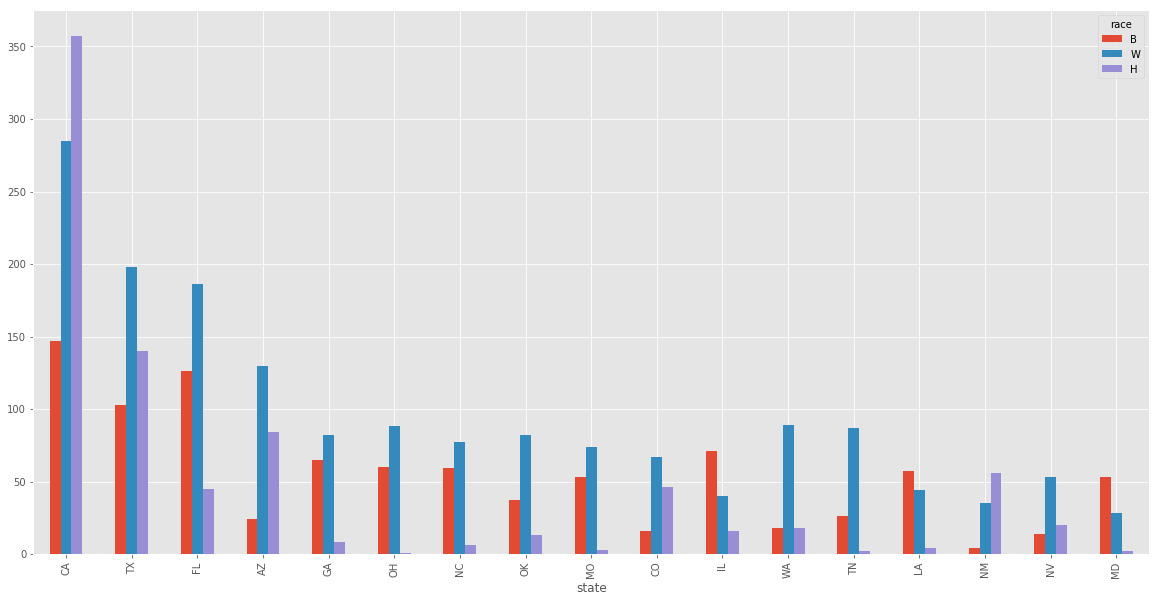

In [676]:
#plt.figure(figsize=(20, 10))
l = top_off_state[['B' , 'W' , 'H']].plot(kind = 'bar',figsize=(20, 10) )

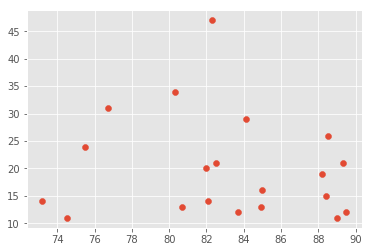

In [33]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = Black_city_Top_off.B
x = Black_city_Top_off.percent_completed_hs
plt.scatter(x, y)
plt.show()

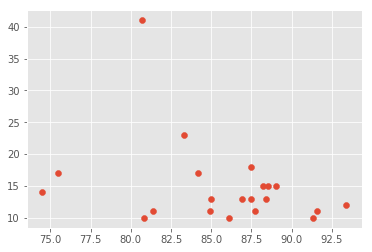

In [34]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = White_city_Top_off.W
x = White_city_Top_off.percent_completed_hs
plt.scatter(x, y)
plt.show()

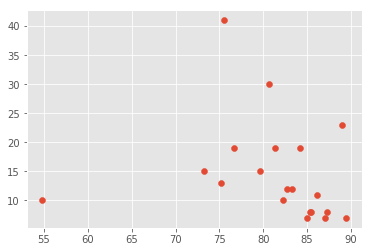

In [35]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = Hispanic_city_Top_off.H
x = Hispanic_city_Top_off.percent_completed_hs
plt.scatter(x, y)
plt.show()

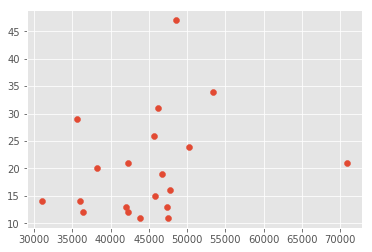

In [36]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = Black_city_Top_off.B
x = Black_city_Top_off['Median Income']
plt.scatter(x, y)
plt.show()

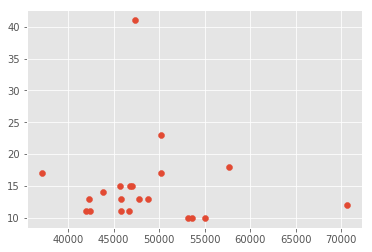

In [37]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = White_city_Top_off.W
x = White_city_Top_off['Median Income']
plt.scatter(x, y)
plt.show()

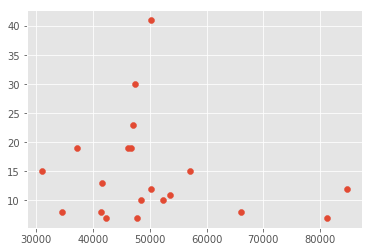

In [38]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = Hispanic_city_Top_off.H
x = Hispanic_city_Top_off['Median Income']
plt.scatter(x, y)
plt.show()

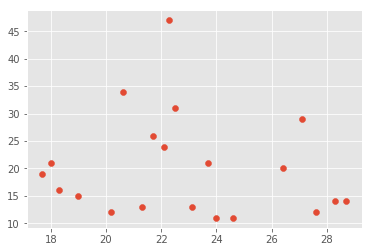

In [39]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = Black_city_Top_off.B
x = Black_city_Top_off['poverty_rate']
plt.scatter(x, y)
plt.show()

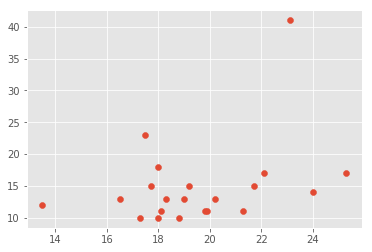

In [40]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = White_city_Top_off.W
x = White_city_Top_off['poverty_rate']
plt.scatter(x, y)
plt.show()

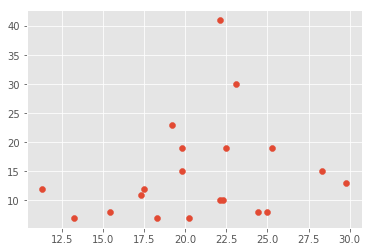

In [41]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = Hispanic_city_Top_off.H
x = Hispanic_city_Top_off['poverty_rate']
plt.scatter(x, y)
plt.show()

# Infrential Statistics 

H0 : P(W) = P(B)

Ha : P(W) ≠ P(B)

In [38]:
w, b

(2677, 1398)

In [3]:
shooting.head()

,name,date,manner_of_death,Armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_range,daysofweek,year,poverty_rate,Median Income,percent_completed_hs
0,Tim Elliot,2015-01-02,shot,armed,34.0,M,A,Shelton,WA,True,attack,Not fleeing,False,20 - 35,Friday,2015,15.02,59315.28,88.20
1,Lewis Lee Lembke,2015-01-02,shot,armed,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,36 - 49,Friday,2015,16.52,48088.07,88.30
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,20 - 35,Saturday,2015,14.76,45160.01,88.23
3,Matthew Hoffman,2015-01-04,shot,armed,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,20 - 35,Sunday,2015,17.12,62652.87,81.96
4,Michael Rodriguez,2015-01-04,shot,armed,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,36 - 49,Sunday,2015,13.36,58857.70,90.11


In [9]:
shooting_chi = shooting[(shooting.race == 'W') | (shooting.race == 'B') | (shooting.race == 'H')]

In [19]:
shooting_chi['race'].value_counts()

W    2677
B    1398
H     927
Name: race, dtype: int64

In [35]:
observe_tbl = pd.crosstab(shooting_chi['race'] , shooting_chi['signs_of_mental_illness'] )

In [36]:
observe_tbl

signs_of_mental_illness,False,True
race,,
B,1212,186
H,766,161
W,1965,711


In [32]:
import scipy.stats as stats

In [37]:
stats.chi2_contingency(observe_tbl)

(106.65511498453128,
 6.92047728859531e-24,
 2,
 array([[1102.24235153,  295.75764847],
        [ 730.8860228 ,  196.1139772 ],
        [2109.87162567,  566.12837433]]))

In [38]:
observe_tbl2 = pd.crosstab(shooting_chi['race'] , shooting_chi['Age_range'] )

In [39]:
stats.chi2_contingency(observe_tbl2)

(363.13634788894854,
 6.479056354420279e-72,
 10,
 array([[  73.78488605,  672.16913235,  393.79888045,  207.93922431,
           47.79248301,    2.51539384],
        [  48.92602959,  445.70871651,  261.12415034,  137.88244702,
           31.69072371,    1.66793283],
        [ 141.28908437, 1287.12215114,  754.07696921,  398.17832867,
           91.51679328,    4.81667333]]))

In [40]:
observe_tbl3 = pd.crosstab(shooting_chi['signs_of_mental_illness'] , shooting_chi['Age_range'] )

In [41]:
stats.chi2_contingency(observe_tbl3)

(49.47377269289668,
 1.775609154647004e-09,
 5,
 array([[ 208.14877025, 1896.20375925, 1110.91521696,  586.60107978,
          134.03519296,    7.0959808 ],
        [  55.85122975,  508.79624075,  298.08478304,  157.39892022,
           35.96480704,    1.9040192 ]]))

In [42]:
shooting_chi.head(2)

,name,date,manner_of_death,Armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_range,daysofweek,year,poverty_rate,Median Income,percent_completed_hs
1,Lewis Lee Lembke,2015-01-02,shot,armed,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,36 - 49,Friday,2015,16.52,48088.07,88.30
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,20 - 35,Saturday,2015,14.76,45160.01,88.23


In [43]:
observe_tbl4 = pd.crosstab(shooting_chi['gender'] , shooting_chi['signs_of_mental_illness'])


(14.227334175937749, 0.00016200018580113693, 1, array([[ 187.6868,   50.3132],
        [3755.3132, 1006.6868]]))

In [44]:

stats.chi2_contingency(observe_tbl4)

(14.227334175937749, 0.00016200018580113693, 1, array([[ 187.6868,   50.3132],
        [3755.3132, 1006.6868]]))

In [45]:
observe_tbl5 = pd.crosstab(shooting_chi['gender'] , shooting_chi['race'])

In [46]:
stats.chi2_contingency(observe_tbl5)

(16.318345843950365,
 0.00028609892310246576,
 2,
 array([[  66.5314937 ,   44.11637672,  127.35212957],
        [1331.4685063 ,  882.88362328, 2548.64787043]]))

In [47]:
observe_tbl6 = pd.crosstab(shooting_chi['gender'] , shooting_chi['Age_range'])

In [48]:
stats.chi2_contingency(observe_tbl6)

(22.62264622162512,
 0.00039849528839501654,
 5,
 array([[1.25638872e+01, 1.14407518e+02, 6.70549890e+01, 3.54073185e+01,
         8.13797241e+00, 4.28314337e-01],
        [2.51436113e+02, 2.28959248e+03, 1.34194501e+03, 7.08592681e+02,
         1.62862028e+02, 8.57168566e+00]]))

In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [56]:
shooting_chi.head(2)

,name,date,manner_of_death,Armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_range,daysofweek,year,poverty_rate,Median Income,percent_completed_hs
1,Lewis Lee Lembke,2015-01-02,shot,armed,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,36 - 49,Friday,2015,16.52,48088.07,88.30
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,20 - 35,Saturday,2015,14.76,45160.01,88.23


In [54]:
mod = ols('race ~ signs_of_mental_illness' , data= shooting_chi).fit()

In [ ]:
anova_table = sm.stats.anova_lm(mod , typ = 2)
print (anova_table)

In [87]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Median_Income ~ B' , data= Black_city_Top_off).fit()

In [85]:
Black_city_Top_off['Median_Income'] = Black_city_Top_off['Median Income']

In [88]:
anova_table = sm.stats.anova_lm(mod , typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
B,9.667416e+06,1.0,0.129997,0.722215
Residual,1.487328e+09,20.0,NaN,NaN


In [89]:
from statsmodels.stats.weightstats import ztest

z = ztest(Hispanic_city_Top_off['H'],Hispanic_city_Top_off['Median Income'])
print("Z-score is equal to : %6.3F  p-value equal to: %6.9F" % (abs(z[0]),z[1]))

Z-score is equal to : 16.531  p-value equal to: 0.000000000


In [90]:
from scipy.stats import ttest_ind

t_test = ttest_ind(Hispanic_city_Top_off['H'],Black_city_Top_off['B'])

In [91]:
rvs1 = stats.norm.rvs(Hispanic_city_Top_off['H'])
rvs2 = stats.norm.rvs(Black_city_Top_off['B'])
#rvs3 = stats.norm.rvs(White_city_Top_off['W'])
stats.ttest_ind(rvs1,rvs2)
(0.26833823296239279, 0.78849443369564776)
stats.ttest_ind(rvs1,rvs2, equal_var = False)


Ttest_indResult(statistic=-1.3664488840382025, pvalue=0.17953075837254076)

# Machine Learning Models

In [122]:
for col in ['gender' , 'race' ,'flee' ,'signs_of_mental_illness' , 'Age_range' , 'daysofweek' , 'month' , 'year' , 
                   'threat_level' , 'body_camera' , 'armed']: 
    shooting_dummies[col] = shooting_dummies[col].astype('category')


In [ ]:
categorical_list = ['gender' , 'race' , 'signs_of_mental_illness' , 'Age_range' , 'daysofweek' , 'month' , 'year' , 
                   'threat_level' , 'flee' , 'body_camera']
shooting_dummies = pd.get_dummies(shooting , columns= categorical_list , drop_first= True )

In [143]:

ml = shooting_dummies.copy()

ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5740 entries, 0 to 5739
Data columns (total 51 columns):
date                            5740 non-null object
age                             5740 non-null int64
city                            5740 non-null object
state                           5740 non-null object
Median Income                   5740 non-null float64
share_white                     5740 non-null float64
share_black                     5740 non-null float64
share_native_american           5740 non-null float64
share_asian                     5740 non-null float64
share_hispanic                  5740 non-null float64
percent_completed_hs            5740 non-null float64
poverty_rate                    5740 non-null float64
gender_Male                     5740 non-null uint8
race_B                          5740 non-null uint8
race_H                          5740 non-null uint8
race_N                          5740 non-null uint8
race_P                          5740 non-n

Filled NAs in three columns **'Threat_level'**, **'flee'** and **'Body_Camera'** with Logistic Regression and KNN. 

In [ ]:
threat_train = ml[~(ml['threat_level'].isnull())]
threat_test = ml[ml['threat_level'].isnull()]

threat_train_X = threat_train[['age' , 'flee', 'body_camera',
       'gender_M', 'race_B', 'race_H', 'race_N', 'race_P', 'race_W',
       'armed_unarmed', 'armed_undetermined', 'signs_of_mental_illness_True',
       'Age_range_20 - 35', 'Age_range_36 - 49', 'Age_range_50 - 64',
       'Age_range_Over 65', 'Age_range_Under 12', 'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'Median Income', 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'poverty_rate']].values

threat_train_y = threat_train['threat_level'].values

threat_test_X = threat_test[['age' , 'flee', 'body_camera',
       'gender_M', 'race_B', 'race_H', 'race_N', 'race_P', 'race_W',
       'armed_unarmed', 'armed_undetermined', 'signs_of_mental_illness_True',
       'Age_range_20 - 35', 'Age_range_36 - 49', 'Age_range_50 - 64',
       'Age_range_Over 65', 'Age_range_Under 12', 'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'Median Income', 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'poverty_rate']].values

threat_test_y = threat_test['threat_level'].values

logreg = LogisticRegression()

logreg.fit(threat_train_X_train , threat_train_y_train)

pred = logreg.predict(threat_train_X_test)
print (accuracy_score(threat_train_y_test , pred))

test_pred = logreg.predict(threat_test_X)
ml.loc[ml['threat_level'].isnull() , 'threat_level'] = test_pred

# Simple approach to normalize values to be within the range

In [ ]:
race_list = ['share_white' , 'share_black' , 'share_hispanic' , 'share_native_american' , 'share_asian']

for x in race_list:
    race_ratio[x] = round(race_ratio[x] / race_ratio['sum'] , 2)

# Create a different models to predict the race of the deceased and determining whether it was black or not. 

Our approach here is to create models with different classification algorithms such as KNN, Logistic Regression, SVM, Random Forest and Naive Bayes and compare their perfomance results together, inorder to find the best model. 

The dataset is unbalanced therefore accuracy is not the best or the most reliable option for determining the perfomrance of the model. For Imbalanced datasets like what we have here, we need to check Precision and Recalls to find how many of our positive and negative predictions are TRUE.  

In [979]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, precision_recall_curve


In [144]:
ml.columns

Index(['date', 'age', 'city', 'state', 'Median Income', 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'poverty_rate', 'gender_Male', 'race_B',
       'race_H', 'race_N', 'race_P', 'race_W', 'signs_of_mental_illness_True',
       'Age_range_20 - 35', 'Age_range_36 - 49', 'Age_range_50 - 64',
       'Age_range_Over 65', 'Age_range_Under 12', 'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'threat_level_threat',
       'flee_not_fleeing', 'body_camera_True', 'armed_armed', 'armed_unarmed'],
      dtype='object')

In [967]:
X = ml[['age','Median Income', 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'poverty_rate', 'gender_Male', 'signs_of_mental_illness_True',
       'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'threat_level_threat',
       'flee_not_fleeing', 'body_camera_True', 'armed_armed', 'armed_unarmed']].values
y = ml['race_B'].values

In [968]:
col = ['age','Median Income', 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'poverty_rate', 'gender_Male', 'signs_of_mental_illness_True',
       'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'threat_level_threat',
       'flee_not_fleeing', 'body_camera_True', 'armed_armed', 'armed_unarmed']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

# KNN

In [150]:

n_neighbors = [10 , 25 , 50 , 76 , 100 , 200]

for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    knn.fit(X_train , y_train)

    y_pred = knn.predict(X_test)

    accuracy = knn.score(X_train , y_train)
    
    print ('The training accuracy for ' + str(n) + ' neighbors is : ' + str(accuracy) )

The training accuracy for 10 neighbors is : 0.7812344449975112
The training accuracy for 25 neighbors is : 0.7580886012941762
The training accuracy for 50 neighbors is : 0.7466401194624191
The training accuracy for 76 neighbors is : 0.7381781981085117
The training accuracy for 100 neighbors is : 0.7312095569935291
The training accuracy for 200 neighbors is : 0.7314584370333499


In [916]:
n_neighbors = [10 , 25 , 50 , 76 , 100 , 200]

for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    knn.fit(X_train , y_train)

    y_pred = knn.predict(X_test)

    print ("KNN accurcay report for ", n , "neighbors \n" )
    
    print (confusion_matrix(y_test , y_pred))

    print (classification_report(y_test , y_pred))
    
    print (accuracy_score(y_test , y_pred))
    
    print('\n')
    


KNN accurcay report for  10 neighbors 

[[1156   90]
 [ 349  127]]
             precision    recall  f1-score   support

          0       0.77      0.93      0.84      1246
          1       0.59      0.27      0.37       476

avg / total       0.72      0.75      0.71      1722

0.7450638792102207


KNN accurcay report for  25 neighbors 

[[1138  108]
 [ 348  128]]
             precision    recall  f1-score   support

          0       0.77      0.91      0.83      1246
          1       0.54      0.27      0.36       476

avg / total       0.70      0.74      0.70      1722

0.735191637630662


KNN accurcay report for  50 neighbors 

[[1216   30]
 [ 430   46]]
             precision    recall  f1-score   support

          0       0.74      0.98      0.84      1246
          1       0.61      0.10      0.17       476

avg / total       0.70      0.73      0.65      1722

0.7328687572590011


KNN accurcay report for  76 neighbors 

[[1229   17]
 [ 453   23]]
             precision   

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [953]:
knn = KNeighborsClassifier(n_neighbors= 25).fit(X_train , y_train)

# Even though Accuracy for KNN is rather high, but recalls in particular are low and that means there are plenty False Negatives in our predictions, which needs to get addressed. 

[[1336   38]
 [   3  518]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1374
          1       0.93      0.99      0.96       521

avg / total       0.98      0.98      0.98      1895

0.9783641160949869


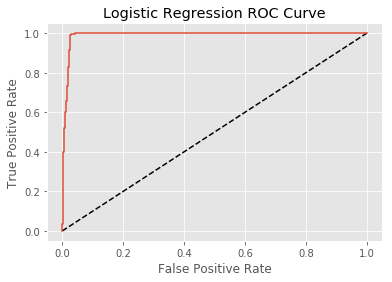

In [969]:

Logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Logreg.fit(X_train , y_train)

y_pred = Logreg.predict(X_test)

print (confusion_matrix(y_test , y_pred))

print (classification_report(y_test , y_pred))

print (accuracy_score(y_test , y_pred))

y_pred_prob = Logreg.predict_proba(X_test)[: ,1]

fpr, tpr , thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1] , [0,1] , 'k--')

plt.plot(fpr , tpr, label = 'Logistic Regression')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC Curve')

plt.show()

**We see much improvement in Logistic Regression. An AUC-ROC graph shows good performance of the model in predicting True classes. **

** In order to evaluate the Logistic Regression model, we use a cross-validation method in this case K-Fold and check the average and std of performance evaluation metrics for different samples. **

** Classification Accuracy **

In [173]:
k_fold = model_selection.KFold(n_splits= 10 , random_state=42)

accuracy = model_selection.cross_val_score(Logreg , X , y , cv=k_fold , scoring='accuracy')

print (accuracy)
print (np.mean(accuracy))
print (np.std(accuracy))

[0.86236934 0.9738676  0.9912892  0.67595819 0.92508711 0.96167247
 0.98780488 0.97560976 0.98432056 0.99651568]
0.9334494773519163
0.0940727835053156


** Logarithmic Loss**

In [174]:
k_fold = model_selection.KFold(n_splits= 10 , random_state= 42)

Log_loss = model_selection.cross_val_score(logreg , X , y , cv = k_fold , scoring= 'neg_log_loss')

print (Log_loss)
print (np.mean(Log_loss))
print (np.std(Log_loss))

[-0.51014477 -0.23184321 -0.13146646 -0.52108582 -0.30609983 -0.26975879
 -0.13672495 -0.12387722 -0.09485735 -0.13310754]
-0.24589659504272832
0.1501276771301856


** Area Under ROC Curve**

In [175]:
k_fold = model_selection.KFold(n_splits = 10 , random_state = 42)

AUC = model_selection.cross_val_score(logreg , X , y , cv = k_fold , scoring= 'roc_auc')

print (AUC)
print (np.mean(AUC))
print (np.std(AUC))

[0.92773874 0.98611129 0.99583333 0.89080308 0.98296189 0.98926754
 0.99586676 0.98867979 0.99494949 0.99858757]
0.9750799492633148
0.034240386852186194


** Comparing the performance of Randome Forest and SVM, we notice the supriority of Randome Forest over SVM. The number of False Negatives and False Positives are significantly less. **

In [951]:
rfc = RandomForestClassifier(n_jobs= 2 , random_state= 42)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

rfc.fit(X_train , y_train)

y_pred = rfc.predict(X_test)

print('Random Forest Performance: \n')
print(confusion_matrix(y_test , y_pred))
print (classification_report(y_test , y_pred))
print (accuracy_score(y_test , y_pred))

pd.crosstab(y_test , y_pred )

Random Forest Performance: 

[[1347   27]
 [   7  514]]
             precision    recall  f1-score   support

          0       0.99      0.98      0.99      1374
          1       0.95      0.99      0.97       521

avg / total       0.98      0.98      0.98      1895

0.9820580474934036


col_0,0,1
row_0,,
0,1347,27
1,7,514


In [853]:
rfc_features = rfc.feature_importances_

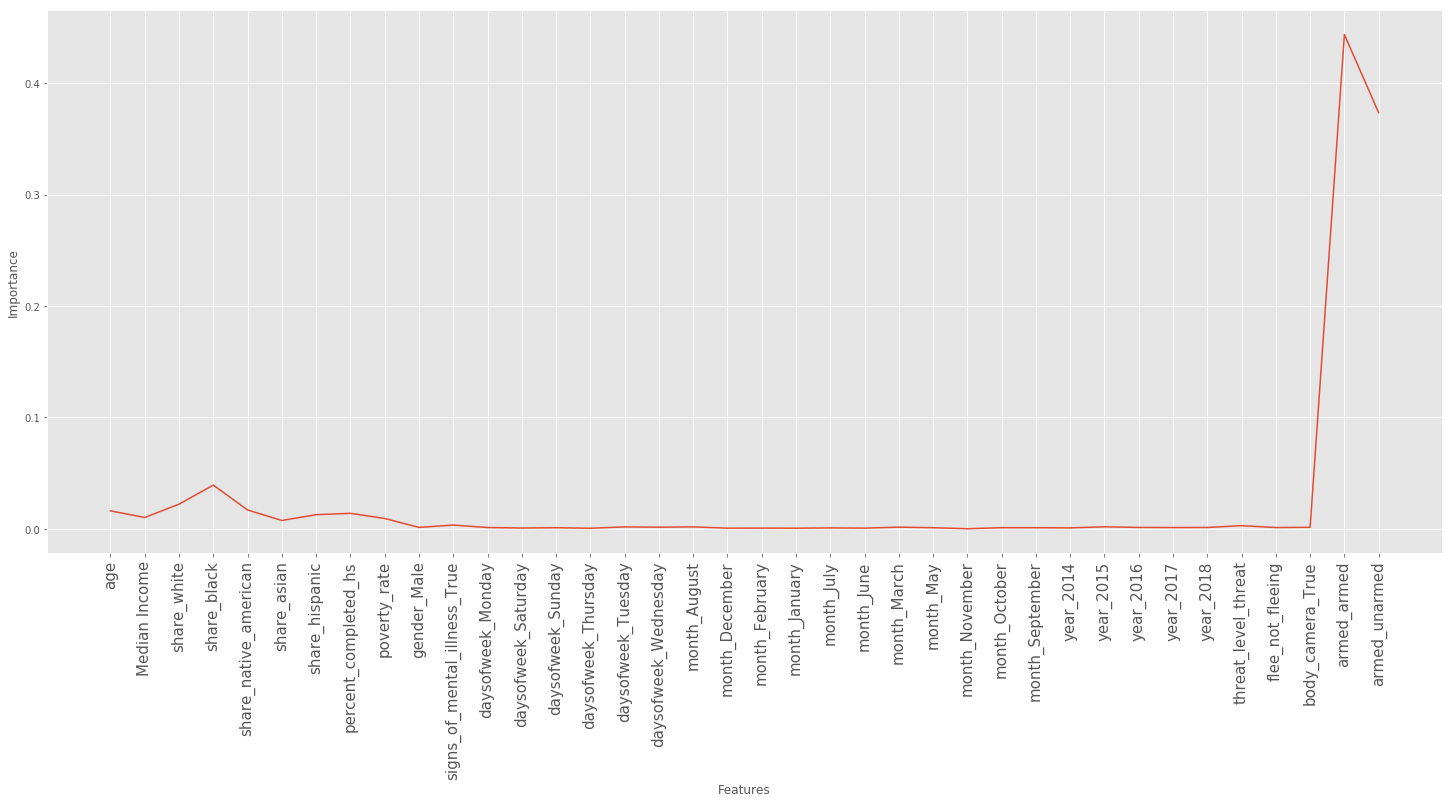

In [854]:
plt.figure(figsize=(25 , 10))

plt.plot(range(len(col)) , rfc_features)

plt.xticks(range(len(col)) , col ,  size = 15 , rotation = 90)

plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [946]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

svm = SVC().fit(X_train , y_train)

pred = svm.predict(X_test)

print('SVM Performance: \n')

print (accuracy_score(y_test , pred))

print (classification_report(y_test , pred))

print (confusion_matrix(y_test , pred))




SVM Performance: 

0.7699208443271768
             precision    recall  f1-score   support

          0       0.77      0.96      0.86      1374
          1       0.73      0.26      0.38       521

avg / total       0.76      0.77      0.73      1895

[[1324   50]
 [ 386  135]]


** There are two hyperparameters for RBF kernel SVM namely C and Gamma. Tuning these parameters correctly can increase the performance of the model. "C" controls the cost of misclassification and "Gamma" defines how far the influence of a single training example reaches.  
large C, can cause overfitting whereas Large Gamma can cause underfitting. We need to pick the best possible values to give us the best bias and varias trade off. **

In [215]:
param_grid = {'C' : [0.1 , 1 , 10 , 100 , 1000] , 'gamma' : [1 , 0.1 , 0.01 , 0.001 , 0.0001]}

grid = GridSearchCV(svm , param_grid , cv = 5)

grid.fit(X_train , y_train)

grid.best_params_

{'C': 1000, 'gamma': 0.0001}

In [216]:
grid.best_score_

0.816260162601626

In [560]:
svm = SVC(C = 100 , gamma = 0.01)

svm.fit(X_train , y_train)

y_pred = svm.predict(X_test)

print('SVM Performance: \n')

print (accuracy_score(y_test , pred))

print (confusion_matrix(y_test , pred))

print (classification_report(y_test , pred))


SVM Performance: 

0.7630662020905923
[[986  47]
 [293 109]]
             precision    recall  f1-score   support

          0       0.77      0.95      0.85      1033
          1       0.70      0.27      0.39       402

avg / total       0.75      0.76      0.72      1435



**Even with the best hyperparameters, Random Forest beats SVM with a very high margin.** 

In [948]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

NB = MultinomialNB().fit(X_train , y_train)

pred = NB.predict(X_test)

print ('Naive Bayes Training Accuracy: ' , NB.score(X_train , y_train))
print ('Naive Bayes Test Accuracy: ' , NB.score(X_test , y_test))
print ('\n')
print (confusion_matrix(y_test , pred))
print (classification_report(y_test , pred))

Naive Bayes Training Accuracy:  0.9490247074122237
Naive Bayes Test Accuracy:  0.9430079155672824


[[1336   38]
 [  70  451]]
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1374
          1       0.92      0.87      0.89       521

avg / total       0.94      0.94      0.94      1895



Another classification algorithm with good prediction rates is Naive Bayes. 

** Coefficients in Logistic Regression are different from Linear Regression. they don't get interpreted as staright forward as Linear Regression. However we still can determine if the fetaure has direct or inverse effect on the model's prediction. **

In [362]:
col = ['age','Median Income', 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'poverty_rate', 'gender_Male', 'signs_of_mental_illness_True',
       'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'threat_level_threat',
       'flee_not_fleeing', 'body_camera_True', 'armed_armed', 'armed_unarmed']
Logreg_coef = pd.DataFrame(Logreg.coef_.reshape(38, 1) , col , columns= ['Coeff']).sort_values(by = 'Coeff' , ascending= False)

Logreg_coef.head(5)



,Coeff
armed_unarmed,0.879945
share_black,0.138886
threat_level_threat,0.034576
poverty_rate,0.033309
body_camera_True,0.012480


In [187]:
rfe_selection = pd.DataFrame(ranking , col , columns= ['Coeff']).sort_values(by = 'Coeff' , ascending= False)

rfe_selection. head(15)

,Coeff
Median Income,15
age,14
percent_completed_hs,13
body_camera_True,12
daysofweek_Sunday,11
poverty_rate,10
year_2016,9
month_May,8
month_November,7
month_February,6


In [179]:
rfe = RFE(Logreg , 24)
fit = rfe.fit(X , y)
ranking = fit.ranking_
print ('Feature ranking: ', fit.ranking_)



Feature ranking:  [14 15  1  1  1  1  1 13 10  1  1  4  5 11  1  1  1  3  1  6  1  2  1  1
  8  7  1  1  1  1  9  1  1  1  1 12  1  1]


In [938]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [940]:
y_test.shape

(1895,)

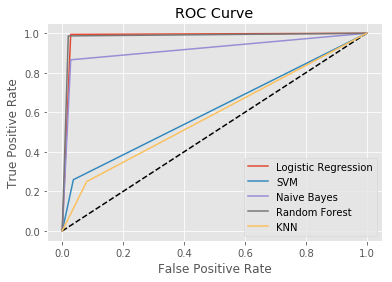

In [955]:
lr_fp, lr_tpr, lr_thresholds  = roc_curve(y_test, Logreg.predict(X_test))
svm_fp, svm_tpr, svm_thresholds  = roc_curve(y_test, svm.predict(X_test))
nb_fp, nb_tpr, nb_thresholds  = roc_curve(y_test, NB.predict(X_test))
rf_fp, rf_tpr, rf_thresholds  = roc_curve(y_test, rfc.predict(X_test))
knn_fp, knn_tpr, knn_thresholds  = roc_curve(y_test, knn.predict(X_test))
plt.plot([0,1], [0,1], 'k--')
plt.plot(lr_fp, lr_tpr, label='Logistic Regression')
plt.plot(svm_fp, svm_tpr, label='SVM')
plt.plot(nb_fp, nb_tpr, label='Naive Bayes')
plt.plot(rf_fp, rf_tpr, label='Random Forest')
plt.plot(knn_fp, knn_tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Predicting if the deceased was armed

In [959]:
X = ml[['age', 'Median Income', 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'poverty_rate', 'gender_Male', 'race_B',
       'race_H', 'race_N', 'race_P', 'race_W', 'signs_of_mental_illness_True',
       'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'threat_level_threat',
       'flee_not_fleeing', 'body_camera_True']].values
y = ml['armed_armed'].values

In [672]:
col = ['age', 'Median Income', 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'poverty_rate', 'gender_Male', 'race_B',
       'race_H', 'race_N', 'race_P', 'race_W', 'signs_of_mental_illness_True',
       'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'threat_level_threat',
       'flee_not_fleeing', 'body_camera_True']

In [961]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

Logreg.fit(X_train , y_train)

pred = Logreg.predict(X_test)

print ('Logistic Regression: \n')

print (accuracy_score(y_test , pred))

print (confusion_matrix(y_test , pred))

print(classification_report(y_test , pred))

#Logreg_coef = pd.DataFrame(Logreg.coef_.reshape(41, 1), col , columns= ['Coeff']).sort_values(by = 'Coeff', ascending=False)
#Logreg_coef.tail()


Logistic Regression: 

0.8116094986807388
[[ 227  352]
 [   5 1311]]
             precision    recall  f1-score   support

          0       0.98      0.39      0.56       579
          1       0.79      1.00      0.88      1316

avg / total       0.85      0.81      0.78      1895



In [620]:
Logreg.intercept_

array([0.00186976])

In [681]:
Logreg.coef_

array([[ 3.51718032e-02,  6.01105548e-06,  7.20568587e-02,
        -7.23133408e-02,  3.84356243e-03, -6.57164131e-04,
         1.08085619e-02, -1.87413673e-03, -3.04801925e-02,
        -3.87934378e-03, -4.76930657e-01,  9.41258535e-02,
         8.86057327e-03,  2.61100119e-03,  3.62403419e-01,
         4.80161216e-02, -6.69298077e-04,  7.45197838e-03,
        -4.04586301e-03, -1.36947453e-03,  7.30109873e-03,
        -3.84395051e-03, -2.92719267e-03,  6.00976349e-04,
        -1.17562367e-03,  1.13621960e-02, -1.94218349e-05,
        -4.56290580e-03,  2.68577330e-03, -3.60489160e-03,
         5.75833239e-03, -1.00277991e-02,  3.99133673e-03,
        -2.97817028e-03, -6.48762924e-03,  6.45634193e-03,
         2.15078555e-02,  2.07156847e-04, -5.42513697e-04,
         1.09028480e-02, -6.07200306e-03]])

In [682]:
Log_Prob = pd.DataFrame(Logreg.coef_.reshape(41, 1), col , columns= ['Coeff'])#.sort_values(by = 'Coeff', ascending=False)

Log_Prob.head(6)

,Coeff
age,0.035172
Median Income,0.000006
share_white,0.072057
share_black,-0.072313
share_native_american,0.003844
share_asian,-0.000657


In [690]:
Logreg.coef_

array([[ 3.51718032e-02,  6.01105548e-06,  7.20568587e-02,
        -7.23133408e-02,  3.84356243e-03, -6.57164131e-04,
         1.08085619e-02, -1.87413673e-03, -3.04801925e-02,
        -3.87934378e-03, -4.76930657e-01,  9.41258535e-02,
         8.86057327e-03,  2.61100119e-03,  3.62403419e-01,
         4.80161216e-02, -6.69298077e-04,  7.45197838e-03,
        -4.04586301e-03, -1.36947453e-03,  7.30109873e-03,
        -3.84395051e-03, -2.92719267e-03,  6.00976349e-04,
        -1.17562367e-03,  1.13621960e-02, -1.94218349e-05,
        -4.56290580e-03,  2.68577330e-03, -3.60489160e-03,
         5.75833239e-03, -1.00277991e-02,  3.99133673e-03,
        -2.97817028e-03, -6.48762924e-03,  6.45634193e-03,
         2.15078555e-02,  2.07156847e-04, -5.42513697e-04,
         1.09028480e-02, -6.07200306e-03]])

In [687]:
Log2prob = (np.exp(Logreg.coef_))#/ (1 + np.exp(Logreg.coef_))
Log2prob

array([[1.03579765, 1.00000601, 1.07471645, 0.93023937, 1.00385096,
        0.99934305, 1.01086719, 0.99812762, 0.96997964, 0.99612817,
        0.62068557, 1.09869801, 1.00889994, 1.00261441, 1.43677845,
        1.04918757, 0.99933093, 1.00747981, 0.99596231, 0.99863146,
        1.00732782, 0.99616343, 0.99707709, 1.00060116, 0.99882507,
        1.01142699, 0.99998058, 0.99544749, 1.00268938, 0.9964016 ,
        1.00577494, 0.99002231, 1.00399931, 0.99702626, 0.99353337,
        1.00647723, 1.02174082, 1.00020718, 0.99945763, 1.0109625 ,
        0.99394639]])

In [695]:
Log_Prob = pd.DataFrame(Log2prob.reshape(41, 1), col , columns= ['Odds']).T#.sort_values(by = 'Coeff', ascending=False)

Log_Prob

,age,Median Income,share_white,share_black,share_native_american,share_asian,share_hispanic,percent_completed_hs,poverty_rate,gender_Male,...,month_October,month_September,year_2014,year_2015,year_2016,year_2017,year_2018,threat_level_threat,flee_not_fleeing,body_camera_True
Odds,1.035798,1.000006,1.074716,0.930239,1.003851,0.999343,1.010867,0.998128,0.96998,0.996128,...,0.990022,1.003999,0.997026,0.993533,1.006477,1.021741,1.000207,0.999458,1.010963,0.993946


In [696]:
np.exp(0.035172)

1.0357978507093017

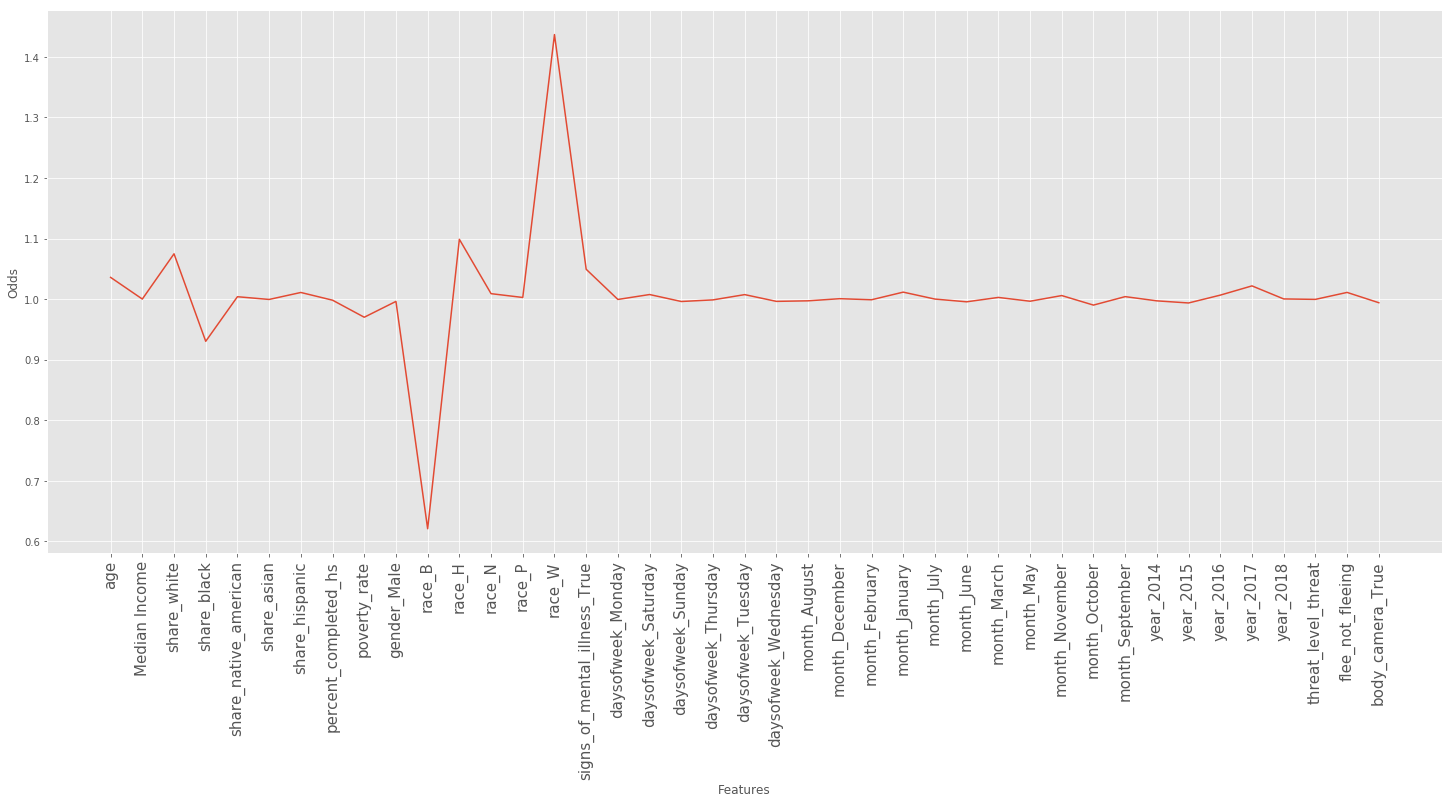

In [692]:
plt.figure(figsize=(25 , 10))

plt.plot(range(len(col)) , Log_Prob)

plt.xticks(range(len(col)) , col ,  size = 15 , rotation = 90)

plt.ylabel('Odds')
plt.xlabel('Features')
plt.show()

In [677]:
X3 = ml[['age', 'Median Income', 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'poverty_rate', 'gender_Male', 'race_B',
       'race_H', 'race_N', 'race_P', 'race_W', 'signs_of_mental_illness_True',
       'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'threat_level_threat',
       'flee_not_fleeing', 'body_camera_True']]
y3 = ml['armed_armed']

In [678]:
import statsmodels.api as sm

logit = sm.Logit(y3 , X3)

result = logit.fit()

print(result.summary2())

         Current function value: inf
         Iterations: 35
                                    Results: Logit
Model:                       Logit                    Pseudo R-squared:         inf   
Dependent Variable:          armed_armed              AIC:                      inf   
Date:                        2019-02-05 19:33         BIC:                      inf   
No. Observations:            5740                     Log-Likelihood:           -inf  
Df Model:                    40                       LL-Null:                  0.0000
Df Residuals:                5699                     LLR p-value:              1.0000
Converged:                   0.0000                   Scale:                    1.0000
No. Iterations:              35.0000                                                  
--------------------------------------------------------------------------------------
                              Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
------------------

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


**The Classification report shows low Precision as a result of low number of True Positives. One simple remedy is to do feature selection to filter out noises and irrelevant features. It can be done manually or automatically. Here we applied an automatic feature selection method called RFE.** 

In [957]:
X = ml[['age', 'Median Income', 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'poverty_rate', 'gender_Male', 'race_B',
       'race_H', 'race_N', 'race_P', 'race_W', 'signs_of_mental_illness_True',
       'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'threat_level_threat',
       'flee_not_fleeing', 'body_camera_True']]
y = ml['armed_armed']

In [856]:
col = ['age', 'Median Income', 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'poverty_rate', 'gender_Male', 'race_B',
       'race_H', 'race_N', 'race_P', 'race_W', 'signs_of_mental_illness_True',
       'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'threat_level_threat',
       'flee_not_fleeing', 'body_camera_True']

In [585]:
rfe = RFE(Logreg , 30)
fit = rfe.fit(X.as_matrix() , y.as_matrix())
ranking = fit.ranking_
print ('Feature ranking: ', ranking )
print (fit.support_)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Feature ranking:  [10 12  1  1  1  1  1  8 11  3  1  1  2  1  1  1  7  1  1  6  1  4  1  1
  5  1  1  1  1  1  1  1  9  1  1  1  1  1  1  1  1]
[False False  True  True  True  True  True False False False  True  True
 False  True  True  True False  True  True False  True False  True  True
 False  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True]


In [586]:
features_bool = np.array(fit.support_)

features = np.array(X.columns)

result = features[features_bool]

print (result)

['share_white' 'share_black' 'share_native_american' 'share_asian'
 'share_hispanic' 'race_B' 'race_H' 'race_P' 'race_W'
 'signs_of_mental_illness_True' 'daysofweek_Saturday' 'daysofweek_Sunday'
 'daysofweek_Tuesday' 'month_August' 'month_December' 'month_January'
 'month_July' 'month_June' 'month_March' 'month_May' 'month_November'
 'month_October' 'year_2014' 'year_2015' 'year_2016' 'year_2017'
 'year_2018' 'threat_level_threat' 'flee_not_fleeing' 'body_camera_True']


In [587]:
X1 = ml[['share_white','share_black' ,'share_native_american' ,'share_asian',
 'share_hispanic', 'race_B' ,'race_H' ,'race_P' ,'race_W',
 'signs_of_mental_illness_True' ,'daysofweek_Saturday' ,'daysofweek_Sunday',
 'daysofweek_Tuesday', 'month_August', 'month_December', 'month_January',
 'month_July' ,'month_June', 'month_March' ,'month_May' ,'month_November',
 'month_October' ,'year_2014', 'year_2015', 'year_2016', 'year_2017',
 'year_2018' ,'threat_level_threat' ,'flee_not_fleeing', 'body_camera_True']].values 


In [588]:
X1_train, X1_test, y_train, y_test = train_test_split( X1, y, test_size=0.33, random_state=42)

Logreg.fit(X1_train , y_train)

pred = Logreg.predict(X1_test)

print ('Logistic Regression with RFE feature selection: \n')

print (accuracy_score(y_test , pred))

print (confusion_matrix(y_test , pred))

print(classification_report(y_test , pred))

Logistic Regression with RFE feature selection: 

0.9688654353562005
[[ 521   58]
 [   1 1315]]
             precision    recall  f1-score   support

          0       1.00      0.90      0.95       579
          1       0.96      1.00      0.98      1316

avg / total       0.97      0.97      0.97      1895



**After performing a feature selection we see a significant improvement in the performance of the model. **

In [962]:
knn = KNeighborsClassifier(n_neighbors= 76)

knn.fit(X_train , y_train)

pred = knn.predict(X_test)

print ('KNN Performance: \n')

print (accuracy_score(y_test , pred))

print (confusion_matrix(y_test , pred))

print(classification_report(y_test , pred))

KNN Performance: 

0.6955145118733509
[[  36  543]
 [  34 1282]]
             precision    recall  f1-score   support

          0       0.51      0.06      0.11       579
          1       0.70      0.97      0.82      1316

avg / total       0.64      0.70      0.60      1895



In [580]:
knn = KNeighborsClassifier(n_neighbors= 62)

knn.fit(X_train , y_train)

pred = knn.predict(X_test)

print ('KNN Performance: \n')

print (accuracy_score(y_test , pred))

print (confusion_matrix(y_test , pred))

print(classification_report(y_test , pred))

KNN Performance: 

0.6981530343007916
[[  47  532]
 [  40 1276]]
             precision    recall  f1-score   support

          0       0.54      0.08      0.14       579
          1       0.71      0.97      0.82      1316

avg / total       0.66      0.70      0.61      1895



** KNN as expected showed a very bad performance by predicting low number of True Positives and High number of False False Positives instead. **  

In [581]:
param_grid = {'C' : [0.1 , 1 , 10 , 100 , 1000] , 'gamma' : [1 , 0.1 , 0.01 , 0.001 , 0.0001]}

grid = GridSearchCV(svm , param_grid ,  cv = 5)

grid.fit(X_train ,  y_train )

print (grid.best_params_)

print (grid.best_score_)

{'C': 1000, 'gamma': 0.0001}
0.764629388816645


In [963]:
svm = SVC(C = 1000 , gamma= 0.001)

svm.fit(X_train , y_train)

pred = svm.predict(X_test)

print ('SVM Performance: \n')

print (confusion_matrix(y_test , pred))

print (classification_report(y_test , pred))

print (accuracy_score(y_test , pred))


SVM Performance: 

[[ 328  251]
 [ 194 1122]]
             precision    recall  f1-score   support

          0       0.63      0.57      0.60       579
          1       0.82      0.85      0.83      1316

avg / total       0.76      0.77      0.76      1895

0.7651715039577837


** After tunning parameters for SVM, we see an increase in the performance. **

In [964]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

rfc.fit(X_train , y_train)

pred = rfc.predict(X_test)

print ('Random Forest Performance: \n')

print(confusion_matrix(y_test , pred))

print (classification_report(y_test , pred))

print (accuracy_score(y_test , pred))



Random Forest Performance: 

[[ 523   56]
 [  12 1304]]
             precision    recall  f1-score   support

          0       0.98      0.90      0.94       579
          1       0.96      0.99      0.97      1316

avg / total       0.96      0.96      0.96      1895

0.9641160949868074


**Random Forest performance is exceptional for imbalanced classes. **

In [858]:
rfc_features = rfc.feature_importances_

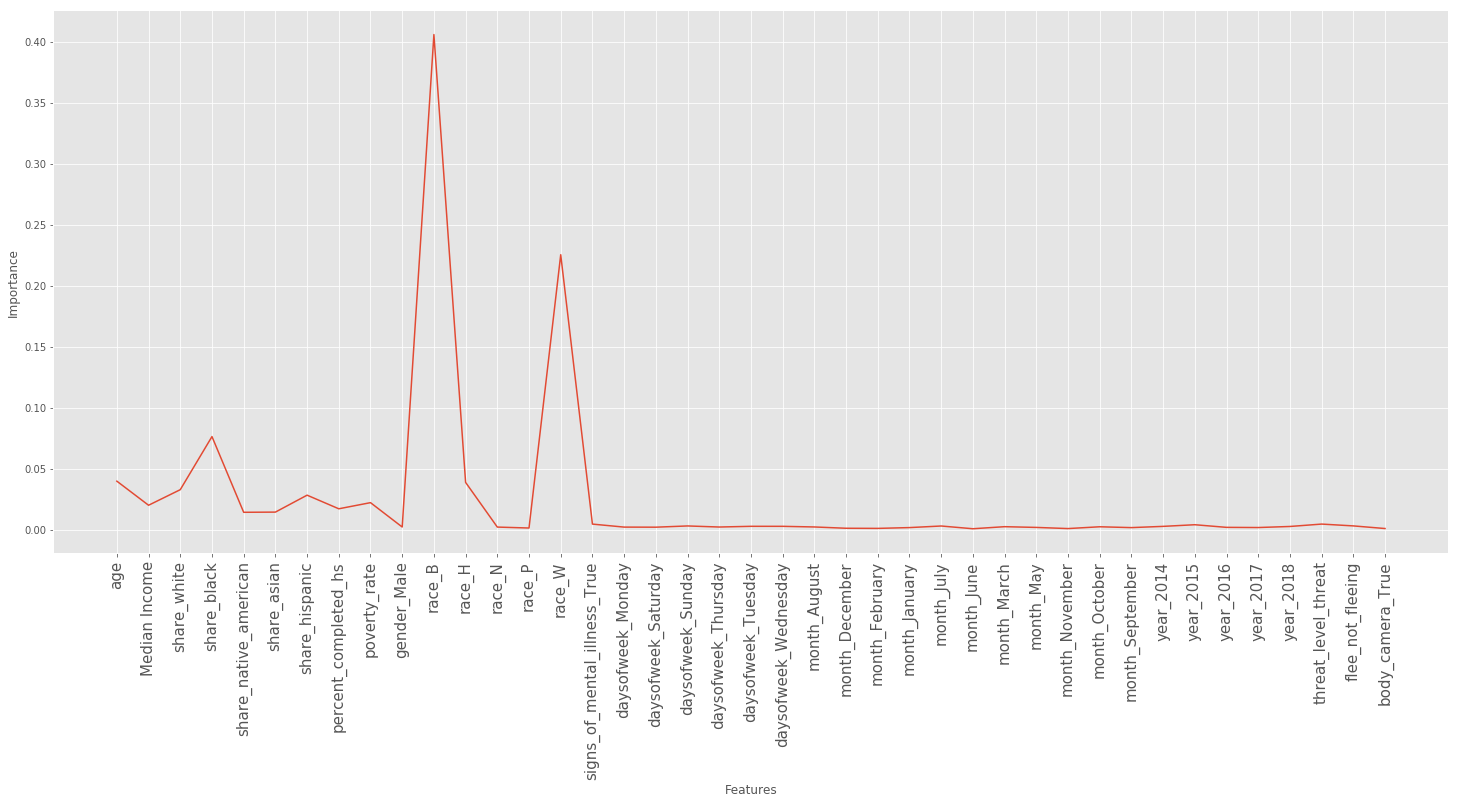

In [859]:
plt.figure(figsize=(25 , 10))

plt.plot(range(len(col)) , rfc_features)

plt.xticks(range(len(col)) , col ,  size = 15 , rotation = 90)

plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [965]:
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

NB = MultinomialNB().fit(X_train , y_train)

pred = NB.predict(X_test)
print ('Naive Bayes Training Accuracy: ' , NB.score(X_train , y_train))
print ('Naive Bayes Test Accuracy: ' , NB.score(X_test , y_test))

print (confusion_matrix(y_test , pred))
print (classification_report(y_test , pred))



Naive Bayes Training Accuracy:  0.9425227568270481
Naive Bayes Test Accuracy:  0.9387862796833774
[[ 526   53]
 [  63 1253]]
             precision    recall  f1-score   support

          0       0.89      0.91      0.90       579
          1       0.96      0.95      0.96      1316

avg / total       0.94      0.94      0.94      1895



** Naive Bayes has a very good performance for imabalnced classes. **

In [956]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

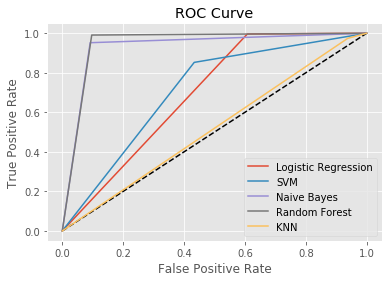

In [966]:
lr_fp, lr_tpr, lr_thresholds  = roc_curve(y_test, Logreg.predict(X_test))
svm_fp, svm_tpr, svm_thresholds  = roc_curve(y_test, svm.predict(X_test))
nb_fp, nb_tpr, nb_thresholds  = roc_curve(y_test, NB.predict(X_test))
rf_fp, rf_tpr, rf_thresholds  = roc_curve(y_test, rfc.predict(X_test))
knn_fp, knn_tpr, knn_thresholds  = roc_curve(y_test, knn.predict(X_test))
plt.plot([0,1], [0,1], 'k--')
plt.plot(lr_fp, lr_tpr, label='Logistic Regression')
plt.plot(svm_fp, svm_tpr, label='SVM')
plt.plot(nb_fp, nb_tpr, label='Naive Bayes')
plt.plot(rf_fp, rf_tpr, label='Random Forest')
plt.plot(knn_fp, knn_tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Predicting the Median Income for the cities that shootings occured

In [903]:
X = ml[['age' , 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'poverty_rate', 'gender_Male', 'race_B',
       'race_H', 'race_N', 'race_P', 'race_W', 'signs_of_mental_illness_True',
       'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'threat_level_threat',
       'flee_not_fleeing', 'body_camera_True', 'armed_armed', 'armed_unarmed']].values

y = ml['Median Income'].values

In [663]:
col = ['age' , 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'poverty_rate', 'gender_Male', 'race_B',
       'race_H', 'race_N', 'race_P', 'race_W', 'signs_of_mental_illness_True',
       'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'threat_level_threat',
       'flee_not_fleeing', 'body_camera_True', 'armed_armed', 'armed_unarmed']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

Linear = LinearRegression().fit(X_train , y_train)

pred = Linear.predict(X_test)

print (Linear.intercept_)

print (Linear.coef_)

In [411]:
cdf = pd.DataFrame(Linear.coef_ , col , columns= ['Coeff']).sort_values(by = 'Coeff', ascending=False)
cdf.head(10)

,Coeff
share_asian,81201.833350
share_hispanic,22131.410996
share_black,6312.276679
race_N,2534.152625
race_H,1757.022171
race_B,1714.845078
month_October,1116.853917
race_W,1113.289189
signs_of_mental_illness_True,1057.100827
share_white,980.030283


Large coefficients can lead to overfitting. In order to penalize large coefficients we need to do some sort of regularizations: Lasso or Ridge Regression

In [727]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

Linear = LinearRegression().fit(X_train , y_train)

pred = Linear.predict(X_test)

print('Linear Regression: \n')

print ('MSE : ' , metrics.mean_squared_error(y_test , pred))

print ('R^2 : ' , metrics.r2_score(y_test , pred))

print ('MAE : ', metrics.mean_absolute_error(y_test , pred))


Linear Regression: 

MSE :  100713943.42558742
R^2 :  0.6129251995845623
MAE :  6209.453185500525


In [726]:
lasso = Lasso(alpha= 0.01)

lasso.fit(X, y)

pred = lasso.predict(X_test)

print ('Lasso Accuracy: \n')

print ('MSE : ' , metrics.mean_squared_error(y_test , pred))

print ('R^2 : ' , metrics.r2_score(y_test , pred))

print ('MAE : ', metrics.mean_absolute_error(y_test , pred))

Lasso Accuracy: 

MSE :  98024289.08905065
R^2 :  0.6232623721754726
MAE :  6109.062384987188


In [725]:
ridge = Ridge().fit(X , y)

pred = ridge.predict(X_test)

print ('Ridge Accuracy: \n')

print ('MSE : ' , metrics.mean_squared_error(y_test , pred))

print ('R^2 : ' , metrics.r2_score(y_test , pred))

print ('MAE : ', metrics.mean_absolute_error(y_test , pred))

Ridge Accuracy: 

MSE :  97921651.35922594
R^2 :  0.6236568406813787
MAE :  6121.797254471883


In [664]:

print (Linear.intercept_)

print (Linear.coef_)

27143.072925531305
[-1.38790171e+01  9.80030283e+02  6.31227668e+03  9.62335449e+02
  8.12018333e+04  2.21314110e+04  4.63595109e+02 -1.09282179e+03
 -1.32832379e+03  1.71484508e+03  1.75702217e+03  2.53415263e+03
 -3.26648010e+04  1.11328919e+03  1.05710083e+03  7.50324639e+02
 -2.40288641e+02 -6.82579072e+01  2.49428399e+01 -4.12950976e+02
  6.32142245e+02 -7.28698686e+01  4.24745806e+02 -5.31558270e+02
 -4.99483787e+02  2.68304287e+02  4.39480537e+00 -8.33136241e+02
  6.98407945e+02  9.26329318e+02  1.11685392e+03  2.77993066e+02
 -8.59674659e+02 -1.11044122e+03 -1.70719426e+03 -1.31113258e+03
 -1.03663902e+03 -2.02841807e+03  6.42838560e+01  1.80421602e+02
 -1.40058967e+03 -2.57170163e+03]


In [884]:
lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X_train , y_train)

print ('MSE : ' , metrics.mean_absolute_error(y_test , pred))

print ('R^2 : ' , metrics.r2_score(y_test , pred))

print ('MAE : ', metrics.mean_absolute_error(y_test , pred))

MSE :  7524.553797409825
R^2 :  0.5020410948835664
MAE :  7524.553797409825


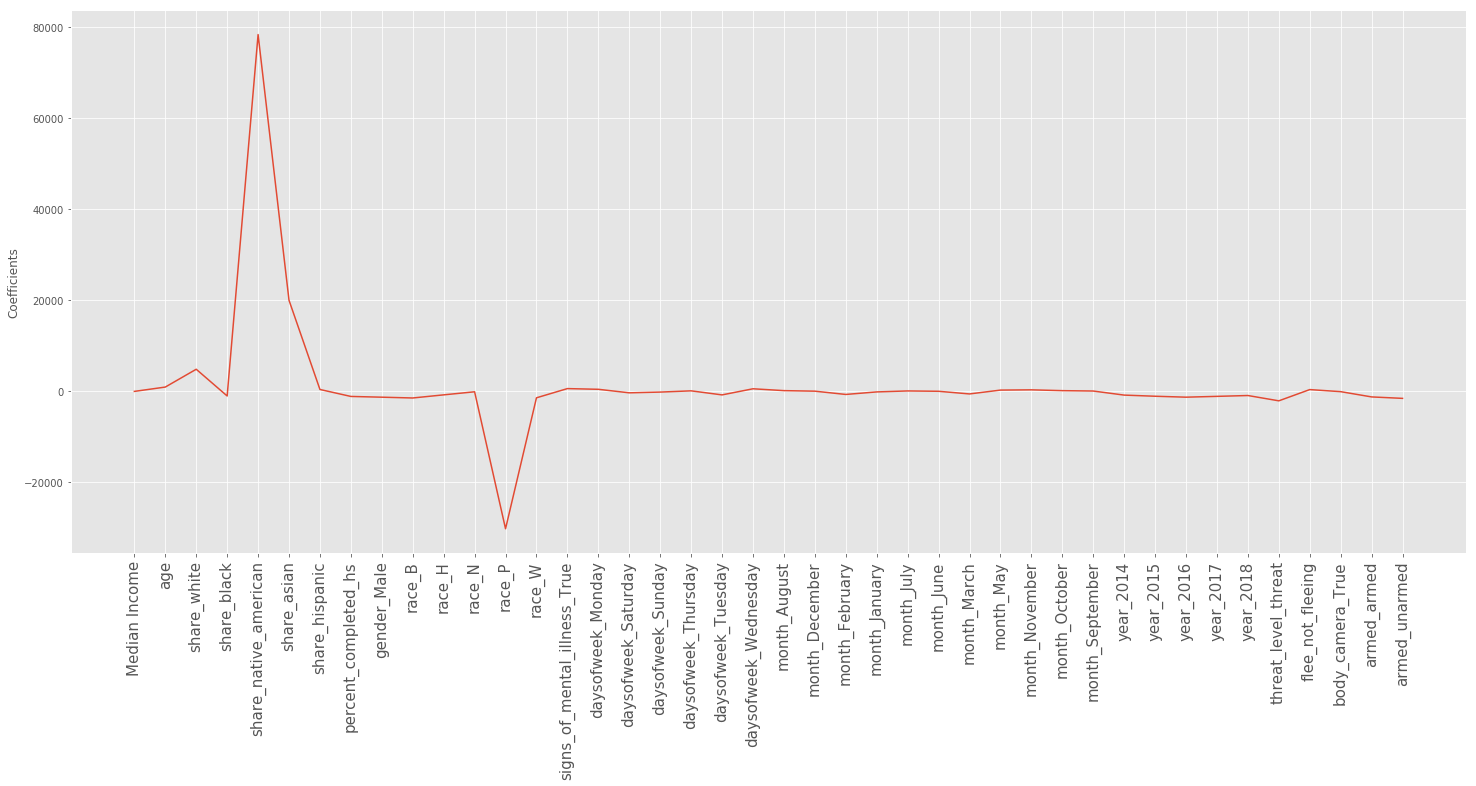

In [730]:
lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X , y).coef_

plt.figure(figsize=(25 , 10))

plt.plot(range(len(col)) , lasso_coef)

plt.xticks(range(len(col)) , col , rotation = 90 , size = 15 )

plt.ylabel('Coefficients')

plt.show()

** The highest contributor in the Income Rate of the cities is the share of Asian residents and it seem income is lower in cities with high number deceased from Pacific ethnicity. **

# Comparing Linear Regression models with and without intercept. 

In [728]:
print ('MSE : ' , metrics.mean_squared_error(y_test , pred))

print ('R^2 : ' , metrics.r2_score(y_test , pred))

print ('MAE : ', metrics.mean_absolute_error(y_test , pred))

MSE :  100713943.42558742
R^2 :  0.6129251995845623
MAE :  6209.453185500525


In [729]:
linear_nointercept = LinearRegression(fit_intercept=False)

linear_nointercept.fit(X_train , y_train)

pred_nointercept = linear_nointercept.predict(X_test)

print ('MSE : ' , metrics.mean_squared_error(y_test , pred_nointercept))

print ('R^2 : ' , metrics.r2_score(y_test , pred_nointercept))

print ('MAE : ', metrics.mean_absolute_error(y_test , pred_nointercept))

MSE :  104201419.00549501
R^2 :  0.5995217534664601
MAE :  6357.024404596742


** Comparing Linear Regression with and without intercept shows models with interception has higher R-Square, so perform better. **

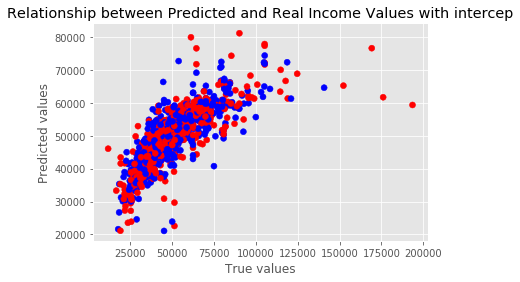

In [518]:

plt.scatter(y_test , pred , c=['r' , 'b'])
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Relationship between Predicted and Real Income Values with intercep')
plt.show()


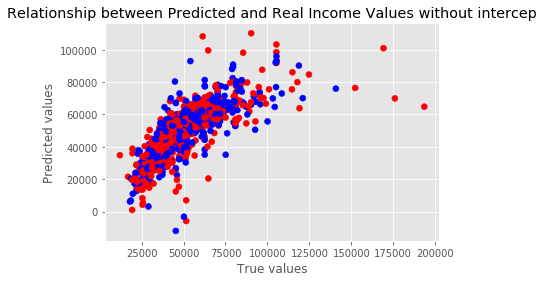

In [519]:
plt.scatter(y_test , pred_nointercept , c=['r' , 'b'])
plt.title('Relationship between Predicted and Real Income Values without intercep')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

** In general there is a strong linear relationship between fitted predicted values and the original price. However it's not perfect and we see some outliers in the graph. ** 

In [886]:
ridge = Ridge(alpha = 1 , normalize= True).fit(X_train , y_train)

pred = ridge.predict(X_test)

print ('Ridge : ' , ridge.score(X_test , y_test))

print ('Lasso : ' ,lasso.score(X_test , y_test))

print('Random Forest : ' , rfc_reg.score(X_test , y_test) )

Ridge :  0.5020410948835664
Lasso :  0.6129898949650919
Random Forest :  0.8081902223471503


In [906]:
rfc_reg = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

rfc_reg.fit(X_train , y_train)

y_pred = rfc_reg.predict(X_test)

print('Random Forest Performance: ' , rfc_reg.score(X_test , y_test) )

print('Random Forest Performance: \n') 

print ('MSE : ' , metrics.mean_squared_error(y_test , y_pred))

print ('R^2 : ' , metrics.r2_score(y_test , y_pred))

print ('MAE : ', metrics.mean_absolute_error(y_test , y_pred))

Random Forest Performance:  0.8111309612763637
Random Forest Performance: 

MSE :  49142299.26732975
R^2 :  0.8111309612763637
MAE :  3207.570649818313


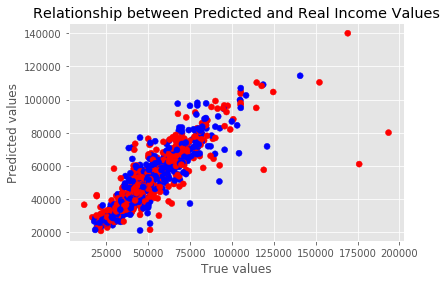

In [905]:
plt.scatter(y_test , y_pred , c=['r' , 'b'])
plt.title('Relationship between Predicted and Real Income Values')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

** Comparing Lasso and Ridge models shows, Lasso has better performance compare to rdige. **

# Predicting if the deceased showed any signs of mental illness

In [741]:
X = ml[['age', 'Median Income', 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'poverty_rate', 'gender_Male', 'race_B',
       'race_H', 'race_N', 'race_P', 'race_W', 
       'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'threat_level_threat',
       'flee_not_fleeing', 'body_camera_True', 'armed_armed', 'armed_unarmed']].values
y = ml['signs_of_mental_illness_True'].values

In [742]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

NB = MultinomialNB(alpha=10).fit(X_train , y_train)

pred = NB.predict(X_test)


print ('Naive Bayes Training Accuracy: ' , NB.score(X_train , y_train))

print ('Naive Bayes Test Accuracy: ' , NB.score(X_test , y_test))

print(confusion_matrix(y_test , pred))
print (classification_report(y_test , pred))



Naive Bayes Training Accuracy:  0.6901443504230961
Naive Bayes Test Accuracy:  0.673054587688734
[[1072  307]
 [ 256   87]]
             precision    recall  f1-score   support

          0       0.81      0.78      0.79      1379
          1       0.22      0.25      0.24       343

avg / total       0.69      0.67      0.68      1722



In [743]:
rfc = RandomForestClassifier().fit(X_train , y_train)

pred = rfc.predict(X_test)

print ('Randome Forest: \n')
print (accuracy_score(y_test , pred))
print (confusion_matrix(y_test , pred))
print (classification_report(y_test , pred))

Randome Forest: 

0.7839721254355401
[[1329   50]
 [ 322   21]]
             precision    recall  f1-score   support

          0       0.80      0.96      0.88      1379
          1       0.30      0.06      0.10       343

avg / total       0.70      0.78      0.72      1722



In [744]:
svm = SVC(C = 100 , gamma= 0.001).fit(X_train , y_train)

pred = svm.predict(X_test)

print ('SVM: \n')
print (accuracy_score(y_test , pred))
print (confusion_matrix(y_test , pred))
print (classification_report(y_test , pred))

SVM: 

0.7299651567944251
[[1186  193]
 [ 272   71]]
             precision    recall  f1-score   support

          0       0.81      0.86      0.84      1379
          1       0.27      0.21      0.23       343

avg / total       0.70      0.73      0.72      1722



In [745]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

Logreg = LogisticRegression().fit(X_train , y_train)

pred = Logreg.predict(X_test)
print ('Logistic Regression: \n')
print (accuracy_score(y_test , pred))
print (confusion_matrix(y_test , pred))
print (classification_report(y_test , pred))



Logistic Regression: 

0.7994722955145118
[[1515    1]
 [ 379    0]]
             precision    recall  f1-score   support

          0       0.80      1.00      0.89      1516
          1       0.00      0.00      0.00       379

avg / total       0.64      0.80      0.71      1895



In [746]:
knn = KNeighborsClassifier(n_neighbors=37).fit(X_train , y_train)

pred = knn.predict(X_test)
print ('KNN: \n')
print (accuracy_score(y_test , pred))
print (confusion_matrix(y_test , pred))
print (classification_report(y_test , pred))

KNN: 

0.8
[[1516    0]
 [ 379    0]]
             precision    recall  f1-score   support

          0       0.80      1.00      0.89      1516
          1       0.00      0.00      0.00       379

avg / total       0.64      0.80      0.71      1895



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


** In all the above predictions we see recall is significantly low, that shows models have a tendency of classifying all the points as Positive and that create great deal of False Negatives. High number of False Negatives and False Positives can be a common case for highly imbalanced classes. **  

**One common approach can be feature selection. Let's see how much we can improve the models by selecting more influential features and filtering out noises. ** 

In [772]:
X = ml[['age', 'Median Income', 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'poverty_rate', 'gender_Male', 'race_B',
       'race_H', 'race_N', 'race_P', 'race_W', 
       'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'threat_level_threat',
       'flee_not_fleeing', 'body_camera_True', 'armed_armed', 'armed_unarmed']]
y = ml['signs_of_mental_illness_True']

In [773]:
rfe = RFE(Logreg , 30)
fit = rfe.fit(X.as_matrix() , y.as_matrix())
ranking = fit.ranking_
print ('Feature ranking: ', ranking )
print ('\n')
print (fit.support_)
print ('\n')

features_bool = np.array(fit.support_)

features = np.array(X.columns)

result = features[features_bool]

print (result)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Feature ranking:  [11 13  1  1  1  1  1 12  9  1  1  1  1  1  1  1  4  1  5  6  7  1  1  8
 10  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  3  1]


[False False  True  True  True  True  True False False  True  True  True
  True  True  True  True False  True False False False  True  True False
 False  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False  True]


['share_white' 'share_black' 'share_native_american' 'share_asian'
 'share_hispanic' 'gender_Male' 'race_B' 'race_H' 'race_N' 'race_P'
 'race_W' 'daysofweek_Monday' 'daysofweek_Sunday' 'month_August'
 'month_December' 'month_July' 'month_June' 'month_May' 'month_November'
 'month_October' 'month_September' 'year_2014' 'year_2015' 'year_2016'
 'year_2017' 'year_2018' 'threat_level_threat' 'flee_not_fleeing'
 'body_camera_True' 'armed_unarmed']


In [806]:
X2 = ml [['share_white' ,'share_black','share_native_american', 'share_asian',
 'share_hispanic' ,'gender_Male', 'race_B', 'race_H', 'race_N' ,'race_P',
 'race_W', 'daysofweek_Monday' ,'daysofweek_Sunday' ,'month_August',
  'month_July' ,'month_June' ,'month_May', 'month_November',
 'month_October', 'month_September' ,'year_2014' ,'year_2015', 'year_2016',
 'year_2017', 'year_2018' ,'threat_level_threat', 'flee_not_fleeing',
 'body_camera_True', 'armed_unarmed']].values

y = ml['signs_of_mental_illness_True'].values

In [807]:
X2_train, X2_test, y_train, y_test = train_test_split( X2, y, test_size=0.35, random_state=42)

Logreg = LogisticRegression().fit(X2_train , y_train)

pred = Logreg.predict(X2_test)
print ('Logistic Regression with 30 features: \n')
print (accuracy_score(y_test , pred))
print (confusion_matrix(y_test , pred))
print (classification_report(y_test , pred))

Logistic Regression with 30 features: 

0.8048780487804879
[[1597   13]
 [ 379   20]]
             precision    recall  f1-score   support

          0       0.81      0.99      0.89      1610
          1       0.61      0.05      0.09       399

avg / total       0.77      0.80      0.73      2009



In [762]:
rfe = RFE(rfc , 27)
fit = rfe.fit(X.as_matrix() , y.as_matrix())
ranking = fit.ranking_
print ('Feature ranking: ', ranking )
print ('\n')
print (fit.support_)
print ('\n')

features_bool = np.array(fit.support_)

features = np.array(X.columns)

result = features[features_bool]

print (result)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Feature ranking:  [ 1  1  1  1  1  1  1  1  1  7 14 12 15 16  1  1  1  1  1  1  1  1 11  2
  1  1  4  3  6 10  9  5  1  1  1  1  1  1  1  8  1 13]


[ True  True  True  True  True  True  True  True  True False False False
 False False  True  True  True  True  True  True  True  True False False
  True  True False False False False False False  True  True  True  True
  True  True  True False  True False]


['age' 'Median Income' 'share_white' 'share_black' 'share_native_american'
 'share_asian' 'share_hispanic' 'percent_completed_hs' 'poverty_rate'
 'race_W' 'daysofweek_Monday' 'daysofweek_Saturday' 'daysofweek_Sunday'
 'daysofweek_Thursday' 'daysofweek_Tuesday' 'daysofweek_Wednesday'
 'month_August' 'month_January' 'month_July' 'year_2014' 'year_2015'
 'year_2016' 'year_2017' 'year_2018' 'threat_level_threat'
 'flee_not_fleeing' 'armed_armed']


In [804]:
X2 = ml [['age', 'Median Income' ,'share_white', 'share_black' ,'share_native_american',
 'share_asian', 'share_hispanic', 'percent_completed_hs' ,'poverty_rate',
 'race_W' ,'daysofweek_Monday' ,'daysofweek_Saturday' ,'daysofweek_Sunday',
 'daysofweek_Thursday' ,'daysofweek_Tuesday', 'daysofweek_Wednesday',
 'month_August', 'month_January' ,'month_March', 'year_2014', 'year_2015',
 'year_2016', 'year_2017', 'year_2018' ,'threat_level_threat',
 'flee_not_fleeing' ,'armed_unarmed']].values

y = ml['signs_of_mental_illness_True'].values

In [808]:
X2_train, X2_test, y_train, y_test = train_test_split( X2, y, test_size=0.25, random_state=42)

Logreg = LogisticRegression().fit(X2_train , y_train)

pred = Logreg.predict(X2_test)
print ('Logistic Regression with 27 features: \n')
print (accuracy_score(y_test , pred))
print (confusion_matrix(y_test , pred))
print (classification_report(y_test , pred))

Logistic Regression with 27 features: 

0.8006968641114982
[[1137    9]
 [ 277   12]]
             precision    recall  f1-score   support

          0       0.80      0.99      0.89      1146
          1       0.57      0.04      0.08       289

avg / total       0.76      0.80      0.72      1435



In [797]:
X2_train, X2_test, y_train, y_test = train_test_split( X2, y, test_size=0.35, random_state=42)

rfc = RandomForestClassifier().fit(X2_train , y_train)

pred = rfc.predict(X2_test)
print ('Random Forest with 27 features: \n')
print (accuracy_score(y_test , pred))
print (confusion_matrix(y_test , pred))
print (classification_report(y_test , pred))

Random Forest with 27 features: 

0.7784967645594824
[[1534   76]
 [ 369   30]]
             precision    recall  f1-score   support

          0       0.81      0.95      0.87      1610
          1       0.28      0.08      0.12       399

avg / total       0.70      0.78      0.72      2009



In [767]:


rfe = RFE(NB , 27)
fit = rfe.fit(X.as_matrix() , y.as_matrix())
ranking = fit.ranking_
print ('Feature ranking: ', ranking )
print ('\n')
print (fit.support_)
print ('\n')

features_bool = np.array(fit.support_)

features = np.array(X.columns)

result = features[features_bool]

print (result)

Feature ranking:  [14 16  7  1  1  1  1 15 13 12  2  1  1  1  8  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  6  5  4  1  9 11  1 10  3]


[False False False  True  True  True  True False False False False  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False False
  True False False  True False False]


['share_black' 'share_native_american' 'share_asian' 'share_hispanic'
 'race_H' 'race_N' 'race_P' 'daysofweek_Monday' 'daysofweek_Saturday'
 'daysofweek_Sunday' 'daysofweek_Thursday' 'daysofweek_Tuesday'
 'daysofweek_Wednesday' 'month_August' 'month_December' 'month_February'
 'month_January' 'month_July' 'month_June' 'month_March' 'month_May'
 'month_November' 'month_October' 'month_September' 'year_2014'
 'year_2018' 'body_camera_True']


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [820]:
X2 = ml [['share_black' ,'share_native_american', 'share_asian' ,'share_hispanic',
 'race_H' ,'race_N', 'race_P' ,'daysofweek_Monday', 'daysofweek_Saturday',
 'daysofweek_Sunday','daysofweek_Thursday', 'daysofweek_Tuesday',
 'daysofweek_Wednesday', 'month_August', 'month_December', 'month_February',
 'month_January', 'month_July' ,'month_June', 'month_March', 'month_May',
 'month_November' ,'month_October', 'month_September', 'year_2014',
 'year_2018' ,'body_camera_True']].values

y = ml['signs_of_mental_illness_True'].values

In [799]:
X2_train, X2_test, y_train, y_test = train_test_split( X2, y, test_size=0.35, random_state=42)

rfc = RandomForestClassifier().fit(X2_train , y_train)

pred = rfc.predict(X2_test)
print ('Naive Bayes with 27 features: \n')
print (accuracy_score(y_test , pred))
print (confusion_matrix(y_test , pred))
print (classification_report(y_test , pred))

Naive Bayes with 27 features: 

0.7640617222498756
[[1502  108]
 [ 366   33]]
             precision    recall  f1-score   support

          0       0.80      0.93      0.86      1610
          1       0.23      0.08      0.12       399

avg / total       0.69      0.76      0.72      2009



In [860]:
X = ml[['age', 'Median Income', 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'poverty_rate', 'gender_Male', 'race_B',
       'race_H', 'race_N', 'race_P', 'race_W', 
       'threat_level_threat',
       'flee_not_fleeing', 'body_camera_True', 'armed_armed', 'armed_unarmed']].values
y = ml['signs_of_mental_illness_True'].values

In [801]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=42)

svm = SVC(C = 100 , gamma= 0.001).fit(X_train , y_train)

pred = svm.predict(X_test)
print ('SVM with 20 features: \n ')
print (accuracy_score(y_test , pred))
print (confusion_matrix(y_test , pred))
print (classification_report(y_test , pred))

SVM with 20 features: 
 
0.7227476356396217
[[1378  232]
 [ 325   74]]
             precision    recall  f1-score   support

          0       0.81      0.86      0.83      1610
          1       0.24      0.19      0.21       399

avg / total       0.70      0.72      0.71      2009



In [868]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=42)

nb = MultinomialNB().fit(X_train , y_train)

pred = nb.predict(X_test)
print ('Naive Bayes with 20 features: \n')
print (accuracy_score(y_test , pred))
print (confusion_matrix(y_test , pred))
print (classification_report(y_test , pred))

Naive Bayes with 20 features: 

0.6625186660029866
[[1231  379]
 [ 299  100]]
             precision    recall  f1-score   support

          0       0.80      0.76      0.78      1610
          1       0.21      0.25      0.23       399

avg / total       0.69      0.66      0.67      2009



In [866]:
X2_train, X2_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=42)

rfc = RandomForestClassifier( n_estimators= 5 , max_features=None ).fit(X2_train , y_train)

pred = rfc.predict(X2_test)
print ('Random Forest with 20 features: \n')
print (accuracy_score(y_test , pred))
print (confusion_matrix(y_test , pred))
print (classification_report(y_test , pred))

Random Forest with 20 features: 

0.7381781981085117
[[1389  221]
 [ 305   94]]
             precision    recall  f1-score   support

          0       0.82      0.86      0.84      1610
          1       0.30      0.24      0.26       399

avg / total       0.72      0.74      0.73      2009



** There was slight improvement in performance of Random Forest and Naive Bayes and SVM after feature selection, but still predictions are not good. ** 

# Predicting the poverty rate of the cities that shootings occured:

In [822]:
ml.columns

Index(['date', 'age', 'city', 'state', 'Median Income', 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'poverty_rate', 'gender_Male', 'race_B',
       'race_H', 'race_N', 'race_P', 'race_W', 'signs_of_mental_illness_True',
       'Age_range_20 - 35', 'Age_range_36 - 49', 'Age_range_50 - 64',
       'Age_range_Over 65', 'Age_range_Under 12', 'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'threat_level_threat',
       'flee_not_fleeing', 'body_camera_True', 'armed_armed', 'armed_unarmed'],
      dtype='object')

In [1030]:
X = ml[['Median Income' , 'age' , 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'gender_Male', 'race_B',
       'race_H', 'race_N', 'race_P', 'race_W', 'signs_of_mental_illness_True',
       'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'threat_level_threat',
       'flee_not_fleeing', 'body_camera_True', 'armed_armed', 'armed_unarmed']].values

y = ml['poverty_rate'].values


In [1031]:
col = ['Median Income' , 'age' , 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'percent_completed_hs', 'gender_Male', 'race_B',
       'race_H', 'race_N', 'race_P', 'race_W', 'signs_of_mental_illness_True',
       'daysofweek_Monday',
       'daysofweek_Saturday', 'daysofweek_Sunday', 'daysofweek_Thursday',
       'daysofweek_Tuesday', 'daysofweek_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'threat_level_threat',
       'flee_not_fleeing', 'body_camera_True', 'armed_armed', 'armed_unarmed']

In [830]:
Linear.coef_

array([-2.84708889e-04,  7.45344749e-03,  1.17465522e+00,  1.11765603e+01,
        1.43772857e+01,  1.36399083e+01,  3.99240157e+00, -2.03000774e-01,
       -3.90291738e-01,  7.10513913e-01,  6.47157980e-01,  2.39439547e+00,
       -4.98090522e+00,  7.12826087e-01, -2.91427385e-02,  7.00519048e-03,
       -4.18183832e-02,  2.18868655e-01,  1.09088330e-01,  1.50371653e-02,
        2.74071723e-01, -2.19345694e-01,  3.94527281e-01,  2.73273199e-02,
       -1.61016041e-01,  1.28531334e-01, -1.23846592e-01, -4.33580428e-01,
       -5.81037414e-02,  5.76607571e-01,  2.95952196e-01,  2.58056133e-01,
        1.43916801e-01, -3.93229289e-02, -2.21874497e-01,  8.81600578e-02,
        4.45889340e-02, -4.73960585e-01,  4.22727494e-01,  3.25323345e-01,
        2.54527076e-01,  1.13762796e-01])

In [845]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

Linear = LinearRegression().fit(X_train , y_train)

pred = Linear.predict(X_test)

print('Linear Regression: \n')

print ('MSE : ' , metrics.mean_squared_error(y_test , pred))

print ('R^2 : ' , metrics.r2_score(y_test , pred))

print ('MAE : ', metrics.mean_absolute_error(y_test , pred))


Linear Regression: 

MSE :  23.128904696668986
R^2 :  0.6193418967317763
MAE :  3.3766652497416842


In [826]:
lasso = Lasso(alpha= 0.01)

lasso.fit(X, y)

pred = lasso.predict(X_test)

print ('Lasso Accuracy: \n')

print ('MSE : ' , metrics.mean_squared_error(y_test , pred))

print ('R^2 : ' , metrics.r2_score(y_test , pred))

print ('MAE : ', metrics.mean_absolute_error(y_test , pred))

Lasso Accuracy: 

MSE :  22.723802820362387
R^2 :  0.6260091087717601
MAE :  3.3796303985523126


In [846]:
ridge = Ridge().fit(X , y)

pred = ridge.predict(X_test)

print ('Ridge Accuracy: \n')

print ('MSE : ' , metrics.mean_squared_error(y_test , pred))

print ('R^2 : ' , metrics.r2_score(y_test , pred))

print ('MAE : ', metrics.mean_absolute_error(y_test , pred))

Ridge Accuracy: 

MSE :  22.549473797625925
R^2 :  0.6288782353477809
MAE :  3.350753711447306


** Ridge has a slight better performance than Lasso and original Linear Regression models. **

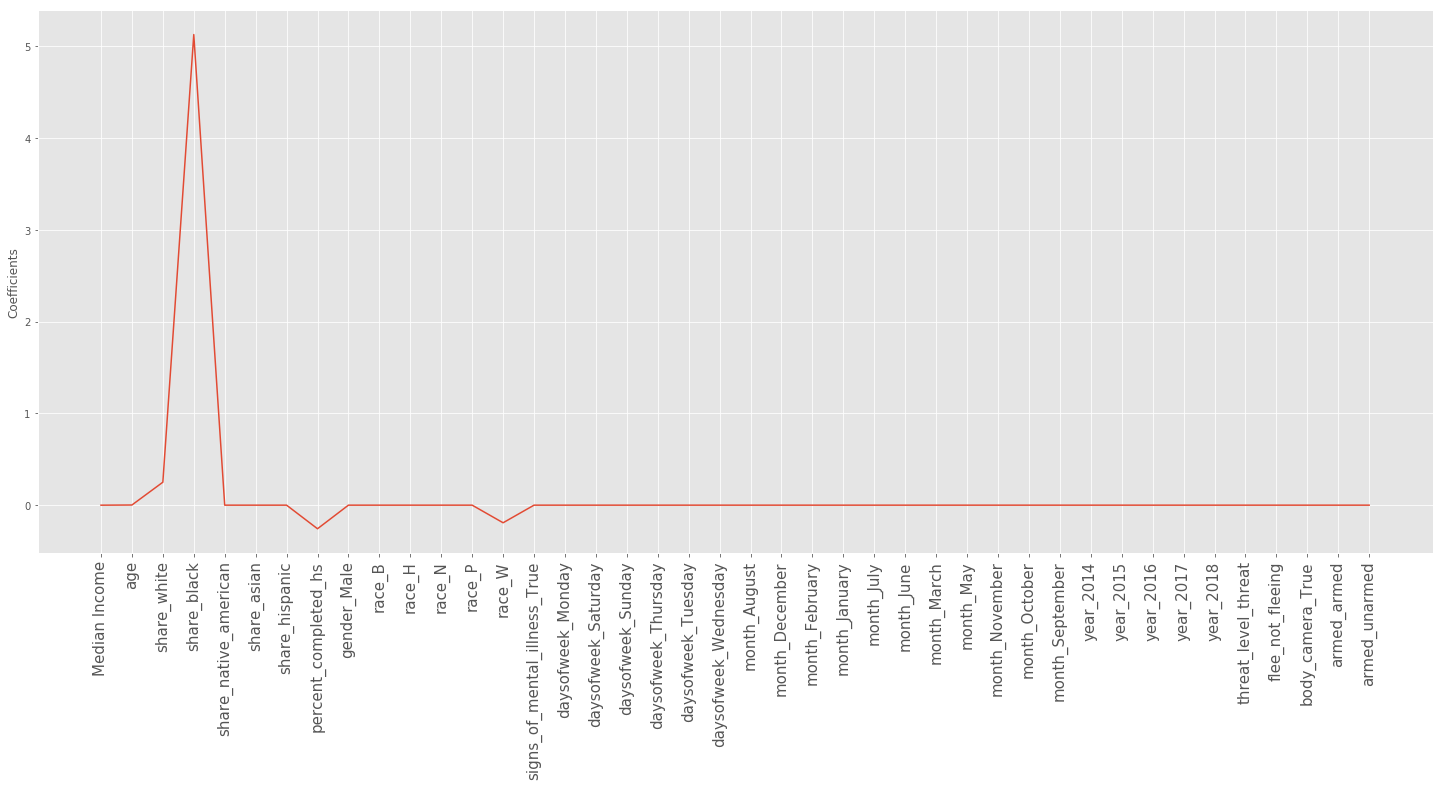

In [832]:
lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X , y).coef_

plt.figure(figsize=(25 , 10))

plt.plot(range(len(col)) , lasso_coef)

plt.xticks(range(len(col)) , col , rotation = 90 , size = 15)

plt.ylabel('Coefficients')

plt.show()

**According to coefficient graph there is a direct relation between the African American and white Population of the cities that fatal shootings took place and the poverty rate. We also see a negative correlation between the percentage of adults graduating highschool and the number of white victims with the poverty rate of cities. **

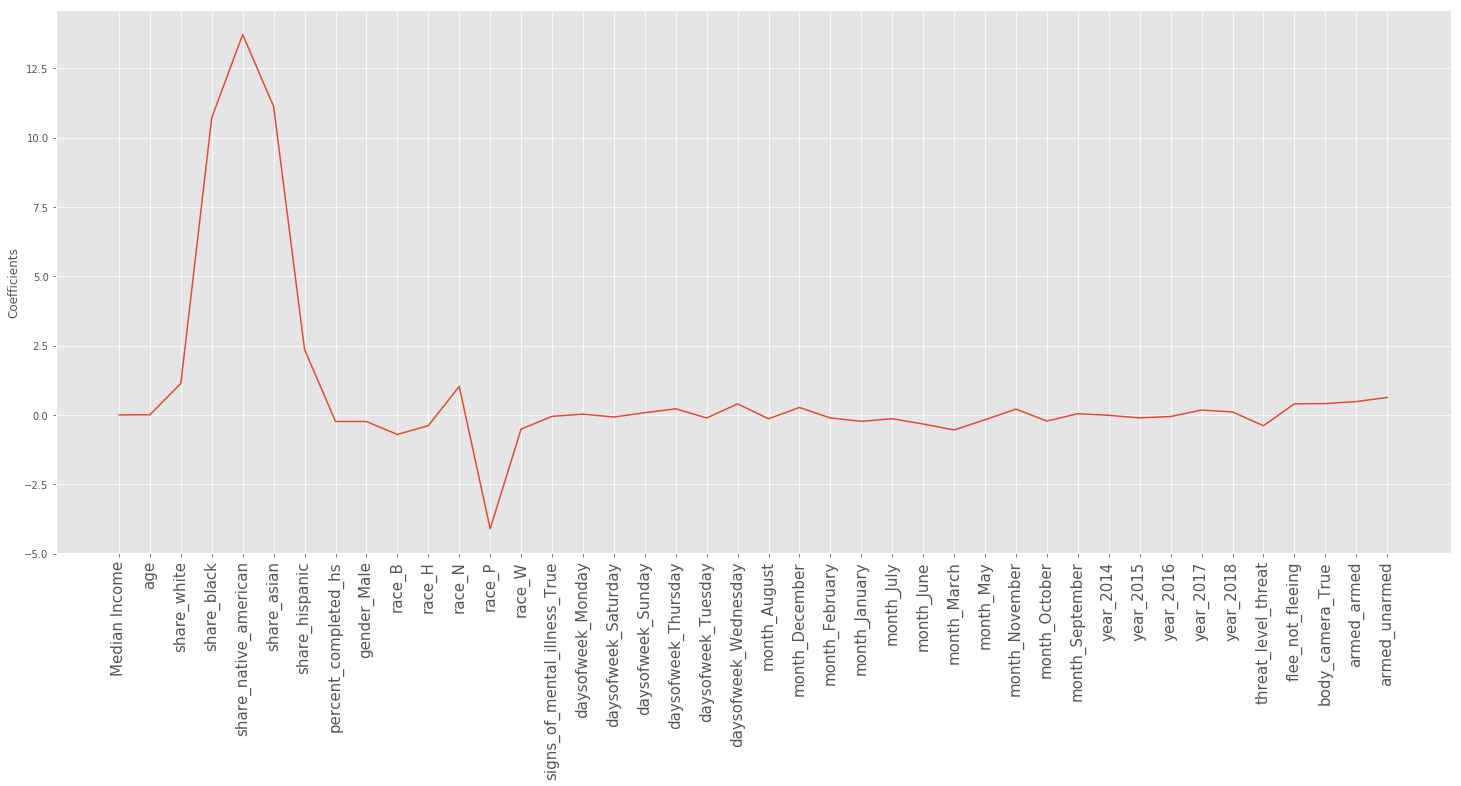

In [833]:
ridge = Ridge()

ridge_coef = ridge.fit(X , y).coef_

plt.figure(figsize=(25 , 10))

plt.plot(range(len(col)) , ridge_coef)

plt.xticks(range(len(col)) , col , rotation = 90 , size = 15)

plt.ylabel('Coefficients')

plt.show()

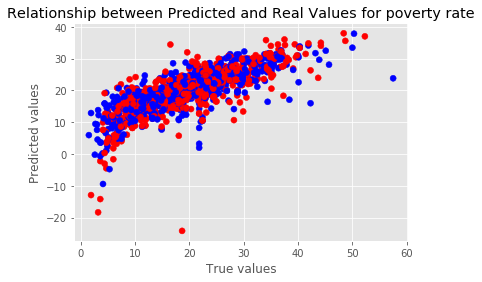

In [848]:
plt.scatter(y_test , pred , c=['r' , 'b'])
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Relationship between Predicted and Real Values for poverty rate')
plt.show()


In [980]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
rfc_reg = RandomForestRegressor().fit(X_train , y_train)

y_pred = rfc_reg.predict(X_test)


#print('Random Forest Performance: ' , rfc_reg.score(X_test , y_test) )

print('Random Forest Performance: \n' )

print ('MSE : ' , metrics.mean_squared_error(y_test , y_pred))

print ('R^2 : ' , metrics.r2_score(y_test , y_pred))

print ('MAE : ', metrics.mean_absolute_error(y_test , y_pred))

Random Forest Performance: 

MSE :  14.816414111393781
R^2 :  0.7561497975435054
MAE :  2.0854011467176625


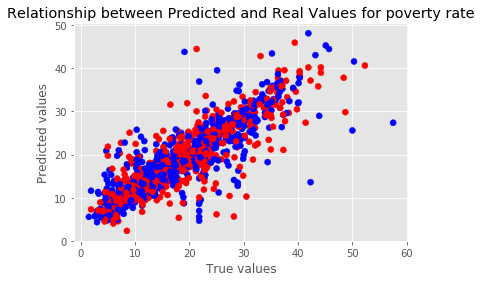

In [894]:
plt.scatter(y_test , y_pred , c=['r' , 'b'])
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Relationship between Predicted and Real Values for poverty rate')
plt.show()


In [1032]:
importance = rfc_reg.feature_importances_

indices = np.argsort(importance)[::-1]

In [1040]:
col[1]

'age'

In [1033]:
std = np.std([tree.feature_importances_ for tree in rfc_reg.estimators_],
             axis=0)

Feature ranking:
1. feature 0 Median Income 	(0.598453)
2. feature 7 percent_completed_hs 	(0.115664)
3. feature 2 share_white 	(0.097424)
4. feature 3 share_black 	(0.029897)
5. feature 1 age 	(0.026169)
6. feature 5 share_asian 	(0.024619)
7. feature 6 share_hispanic 	(0.023645)
8. feature 8 gender_Male 	(0.009655)
9. feature 4 share_native_american 	(0.008054)
10. feature 11 race_N 	(0.005805)
11. feature 30 month_October 	(0.003347)
12. feature 22 month_December 	(0.003339)
13. feature 33 year_2015 	(0.003284)
14. feature 41 armed_unarmed 	(0.002978)
15. feature 13 race_W 	(0.002688)
16. feature 14 signs_of_mental_illness_True 	(0.002595)
17. feature 23 month_February 	(0.002329)
18. feature 10 race_H 	(0.002305)
19. feature 21 month_August 	(0.002172)
20. feature 32 year_2014 	(0.002135)
21. feature 18 daysofweek_Thursday 	(0.002122)
22. feature 34 year_2016 	(0.002109)
23. feature 24 month_January 	(0.002037)
24. feature 35 year_2017 	(0.001995)
25. feature 27 month_March 	(0.001

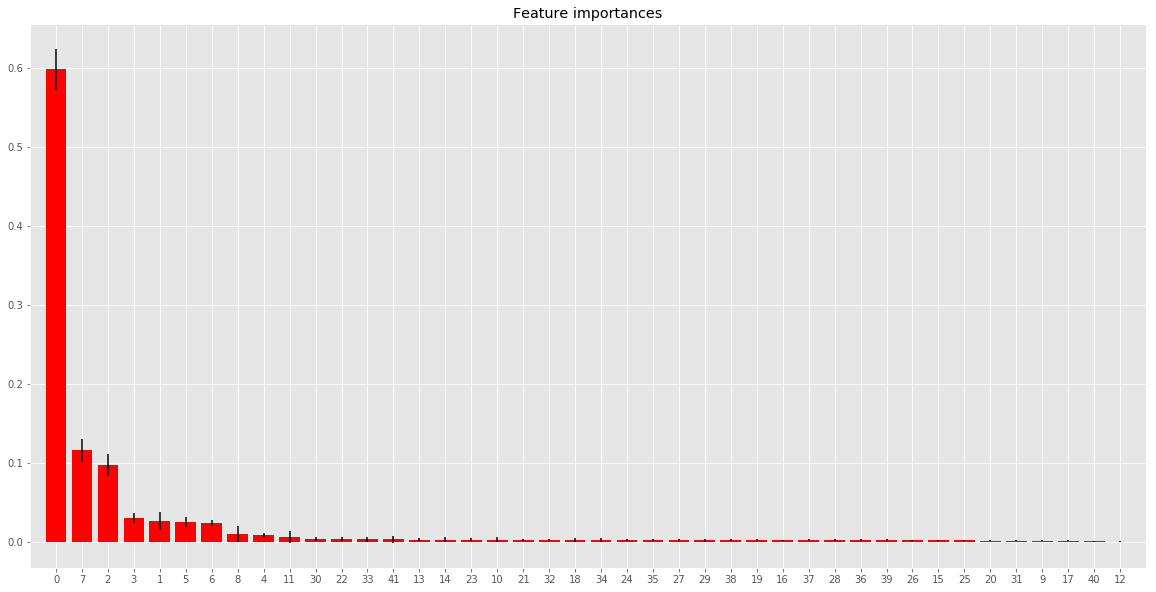

In [1041]:
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s \t(%f)" % (f + 1, indices[f], col[indices[f]] ,  importance[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importance[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

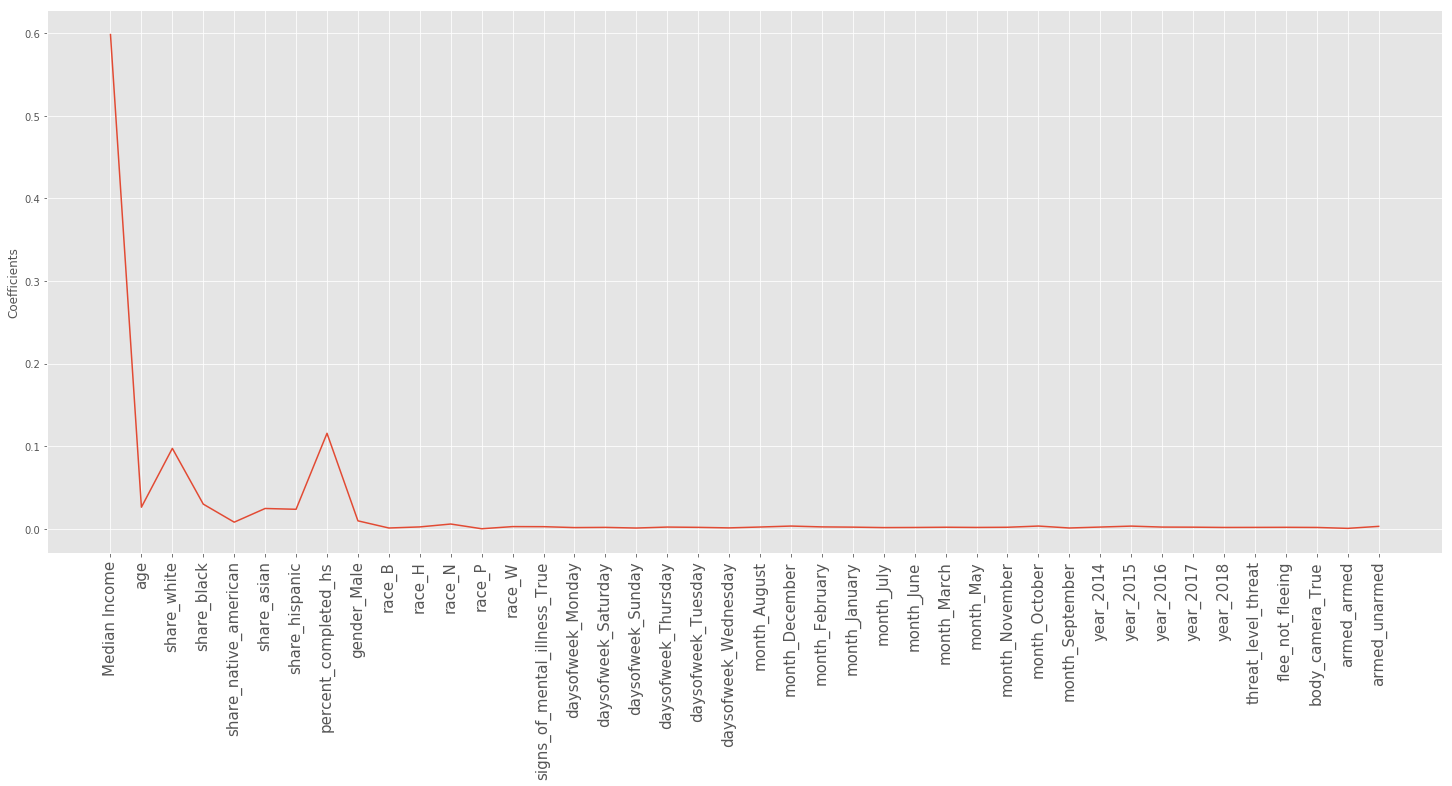

In [999]:
plt.figure(figsize=(25 , 10))

plt.plot(range(len(col)) , importance)

plt.xticks(range(len(col)) , col , rotation = 90 , size = 15)

plt.ylabel('Coefficients')

plt.show()